In [12]:
import seaborn as sns
import matplotlib.transforms as transforms
from datetime import datetime
from skimage.io import imsave
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
#%plt.style.use("v_paper")
import pandas as pd
#import deepdish as dd
from scipy.io import loadmat
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as smf
import re
from statsmodels.stats.anova import anova_lm
import os
import os.path
import statsmodels.api as smapi
import sys
import warnings
from sklearn.linear_model import LinearRegression
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import seaborn as sns
#import qgrid
import statsmodels as sm
import scipy
from pathlib import Path
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.api as sms
import statsmodels.stats.multitest as multi

In [3]:
Regionsdf=pd.read_pickle("Regionsdf.pkl")

In [4]:
Compdf=pd.read_pickle("Compdf.pkl")

In [2]:
GoodICFiles=pd.read_pickle("GoodICsdf.pkl")

In [5]:
Compdf['CompID'].unique()

array(['', 'AL', 'KCab', 'AVLPm', 'PI', 'PB-EB', 'SMPl-SIP', 'PN',
       'AVLPprojm', 'SLP-SMPproj', 'FBcol', 'PLP-LH', 'FB-NO',
       'Beta2Betap2', 'SIP-FB', 'SMPm', 'EB', 'PENP-CL', 'SPS',
       'BU-PBl-EB', 'PRW', 'SLP-SMP', 'PNv', 'SIP-SMPd', 'KCapbp',
       'SMPd-PI', 'AVLPd', 'SLP', 'Alpha3', 'CL', 'SLP-Alpha', 'OL',
       'AOTU-BU', 'GNGm', 'GNGml', 'IPS-Y', 'OL-PENP', 'LAL-PS',
       'AMMC-WE', 'OL-WE', 'PRW-SLP', 'VLPl', 'PBfull', 'PN-KC', 'GNGvw',
       'WPENb', 'KCg', 'GNG-AMMC', 'FBlayv', 'CA', 'OL-VLPl', 'AMMC-PLP',
       'FBlayd', 'MB-ML-Cre', 'CLvert', 'AVLPproj', 'OL-PLP', 'PI-PRW',
       'AVLPsmear', 'IB', 'GNGva', 'Others', 'Beta1Betap1', 'PB', 'LOP',
       'PLP', 'NO', 'FBlaym', 'LH-SLP', 'AVLPonlyproj', 'PPL-SMP', 'GNGl',
       'AVLPprojl', 'NO-PB-EB', 'vaCells', 'OL-Center', 'Gamma4', 'GNGp',
       'SLP-Alphap3', 'SIP', 'SIP-SLP', 'PI-POC', 'LaT', 'NO-PB', 'LAL',
       'turnd', 'GNGcon', 'ATL', 'Gamma2', 'PENPp', 'CL?', 'PVLP',
       'PENP-LH', 'SIP-

In [6]:
Compdf[Compdf['CompID']=='FBlayd']['GAL4']

1694     Nsyb
17601     Cha
17615     Cha
24946      TH
25159      TH
25242      TH
25428      TH
25468      TH
25567      TH
25657      TH
25933      TH
26769      TH
27116      TH
27211      TH
27369      TH
27654      TH
28100     Trh
28273     Trh
29188     Trh
29276     Trh
29360     Trh
29813     Trh
29905     Trh
30186     Trh
30471     Trh
Name: GAL4, dtype: object

In [7]:
Compdf=Compdf.query('CompID!=" "')
Compdf=Compdf.query('CompID!=""')

Compdf=Compdf.groupby('CompID').filter(lambda x : len(x)>4)

In [8]:
CompOrder=pd.read_csv('AllCompIDOrderedVF.txt',header=None,keep_default_na=False)

L= np.argsort(list(CompOrder[0]))
               
L2=np.argsort(L)             

Compdf=Compdf[Compdf.CompID.isin(list(CompOrder[0]))]

In [9]:
print(Compdf['CompID'].unique())

['AL' 'KCab' 'AVLPm' 'PI' 'PB-EB' 'SMPl-SIP' 'PN' 'AVLPprojm'
 'SLP-SMPproj' 'FBcol' 'PLP-LH' 'Beta2Betap2' 'SIP-FB' 'SMPm' 'EB'
 'PENP-CL' 'SPS' 'BU-PBl-EB' 'PRW' 'SLP-SMP' 'PNv' 'SIP-SMPd' 'KCapbp'
 'SMPd-PI' 'AVLPd' 'SLP' 'Alpha3' 'CL' 'SLP-Alpha' 'OL' 'AOTU-BU' 'GNGm'
 'GNGml' 'IPS-Y' 'OL-PENP' 'LAL-PS' 'AMMC-WE' 'OL-WE' 'PRW-SLP' 'VLPl'
 'PBfull' 'PN-KC' 'GNGvw' 'WPENb' 'KCg' 'GNG-AMMC' 'FBlayv' 'AMMC-PLP'
 'FBlayd' 'CLvert' 'OL-PLP' 'PI-PRW' 'AVLPsmear' 'IB' 'GNGva'
 'Beta1Betap1' 'PB' 'LOP' 'PLP' 'NO' 'FBlaym' 'LH-SLP' 'AVLPonlyproj'
 'PPL-SMP' 'GNGl' 'AVLPprojl' 'vaCells' 'Gamma4' 'ATL' 'Gamma2' 'CL?'
 'Alpha2' 'Gamma3' 'CL-LH' 'MultiGl' 'Gamma5' 'Gamma1' 'PPM2-VI' 'EB-DA'
 'PPM2-LW' 'WE-DA' 'PB-DA' 'Alphap3' 'M-Omega' 'OL-FB' 'AVLPshell'
 'Alpha1' 'SCLtract' 'FB-SN']


In [31]:
lin_reg = smf.ols(formula="CoefWalk ~ CompID+UAS", data=Compdf).fit()
r_matrix=np.eye(len(lin_reg.params))
r_matrix[:,0]=1
tt = lin_reg.t_test(r_matrix)
multi.multipletests(tt.pvalue,0.05,method='fdr_bh')

(array([ True,  True,  True, False,  True,  True,  True, False,  True,
         True,  True,  True, False, False, False, False,  True, False,
         True,  True, False, False, False, False,  True, False,  True,
        False,  True, False,  True,  True,  True,  True,  True,  True,
        False, False,  True, False, False,  True,  True, False, False,
        False,  True, False,  True,  True,  True, False,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, False,
         True, False, False, False, False,  True, False,  True,  True,
         True,  True, False, False, False, False, False, False, False,
        False,  True,  True,  True,  True,  True,  True, False,  True,
         True,  True,  True,  True]),
 array([5.56920938e-31, 2.13068171e-05, 1.87347452e-06, 9.26777422e-01,
        1.48488343e-06, 2.63359214e-02, 1.25291071e-03, 7.82426292e-01,
        1.43846759e-08, 1.29938368e-05, 1.75922115e-05, 8.64432520e-13,
        7.47764074e-01, 5.82939804e-

In [36]:
[list(CompOrder[0])[i] for i in range(len(L2)) if not multi.multipletests(tt.pvalue,0.05,method='fdr_bh')[0][L2[i]]]

['PN',
 'PN-KC',
 'KCab',
 'KCapbp',
 'KCg',
 'Beta1Betap1',
 'Gamma1',
 'Gamma2',
 'Gamma4',
 'Gamma5',
 'SLP-Alpha',
 'Alpha1',
 'Alpha2',
 'Alpha3',
 'Alphap3',
 'SCLtract',
 'CLvert',
 'CL?',
 'CL-LH',
 'SMPd-PI',
 'PPL-SMP',
 'SIP-SMPd',
 'SIP-FB',
 'FB-SN',
 'SLP-SMPproj',
 'SLP-SMP',
 'SLP',
 'LH-SLP',
 'FBlayv',
 'FBlayd',
 'NO',
 'EB',
 'AOTU-BU',
 'AVLPonlyproj',
 'PLP-LH',
 'PLP',
 'PI',
 'vaCells']

In [37]:
lin_reg = smf.ols(formula="R2Walk ~ CompID+UAS", data=Compdf).fit()
r_matrix=np.eye(len(lin_reg.params))
r_matrix[:,0]=1
tt = lin_reg.t_test(r_matrix)
multi.multipletests(tt.pvalue,0.05,method='fdr_bh')

(array([ True,  True,  True,  True,  True,  True,  True, False,  True,
         True,  True,  True, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True,  True,  True, False,  True,
         True,  True, False,  True,  True,  True,  True,  True,  True,
        False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True, False,  True,  True,
         True,  True, False, False,  True,  True, False, False,  True,
         True,  True,  True,  True,  True,  True,  True, False,  True,
         True,  True,  True,  True]),
 array([1.13304581e-29, 1.47989811e-11, 1.43774662e-09, 3.53460088e-06,
        1.17837219e-11, 4.99979809e-03, 4.73979928e-31, 3.12346687e-01,
        3.49329267e-22, 1.09691452e-11, 1.36215571e-08, 1.45823467e-05,
        5.48180372e-01, 8.81156455e-

In [38]:
[list(CompOrder[0])[i] for i in range(len(L2)) if not multi.multipletests(tt.pvalue,0.05,method='fdr_bh')[0][L2[i]]]

['Gamma1',
 'SLP-Alpha',
 'Alpha1',
 'Alpha2',
 'Alpha3',
 'Alphap3',
 'SCLtract',
 'PPL-SMP',
 'SIP-FB',
 'FB-SN',
 'SLP-SMP',
 'FBlayv',
 'AVLPonlyproj',
 'vaCells']

In [33]:
lin_reg = smf.ols(formula="CoefWalk ~ CompID+UAS", data=Compdf).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               CoefWalk   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     21.80
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          2.40e-282
Time:                        09:13:18   Log-Likelihood:                 2242.7
No. Observations:                3929   AIC:                            -4297.
Df Residuals:                    3835   BIC:                            -3707.
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.1813      0.015     11.903      0.000       0.151       0.211
CompID[T.AMMC-PLP]        -0.0673      0.029     -2.329      0.020      -0.124      -0.011
CompID[T.AMMC-WE]         -0.0772      0.024     -3.153      0.002      -0.125      -0.029
CompID[T.AOTU-BU]         -0.1836      0.027     -6.677      0.000      -0.238      -0.130
CompID[T.ATL]             -0.0242      0.034     -0.713      0.476      -0.091       0.042
CompID[T.AVLPd]           -0.0949      0.037     -2.547      0.011      -0.168      -0.022
CompID[T.AVLPm]           -0.1337      0.019     -7.216      0.000      -0.170      -0.097
CompID[T.AVLPonlyproj]    -0.1293      0.139     -0.930      0.353      -0.402       0.143
CompID[T.AVLPprojl]       -0.0249      0.029     -0.851      0.395      -0.082       0.032
CompID[T.AVLPprojm]       -0.0463      0.032     -1.449      0.148      -0.109       0.016
CompID[T.AVLPshell]       -0.2923      0.028    -10.496      0.000      -0.347      -0.238
CompID[T.AVLPsmear]        0.1162      0.042      2.746      0.006       0.033       0.199
CompID[T.Alpha1]          -0.2119      0.071     -3.002      0.003      -0.350      -0.073
CompID[T.Alpha2]          -0.2054      0.036     -5.784      0.000      -0.275      -0.136
CompID[T.Alpha3]          -0.2030      0.038     -5.288      0.000      -0.278      -0.128
CompID[T.Alphap3]         -0.2123      0.058     -3.644      0.000      -0.327      -0.098
CompID[T.BU-PBl-EB]       -0.0172      0.032     -0.537      0.591      -0.080       0.046
CompID[T.Beta1Betap1]     -0.1058      0.046     -2.301      0.021      -0.196      -0.016
CompID[T.Beta2Betap2]     -0.0824      0.027     -3.087      0.002      -0.135      -0.030
CompID[T.CL]              -0.0788      0.026     -3.036      0.002      -0.130      -0.028
CompID[T.CL-LH]           -0.1338      0.032     -4.164      0.000      -0.197      -0.071
CompID[T.CL?]             -0.1234      0.051     -2.425      0.015      -0.223      -0.024
CompID[T.CLvert]          -0.1324      0.034     -3.891      0.000      -0.199      -0.066
CompID[T.EB]              -0.1712      0.024     -7.241      0.000      -0.218      -0.125
CompID[T.EB-DA]            0.2066      0.051      4.050      0.000       0.107       0.307
CompID[T.FB-SN]           -0.1930      0.058     -3.302      0.001      -0.308      -0.078
CompID[T.FBcol]           -0.1538      0.017     -8.941      0.000      -0.187      -0.120
CompID[T.FBlayd]          -0.1203      0.044     -2.732      0.006      -0.207      -0.034
CompID[T.FBlaym]          -0.0912      0.041     -2.232      0.026      -0.171      -0.011
CompID[T.FBlayv]          -0.1719      0.038     -4.468      0.000      -0.247      -0.096
CompID[T.GNG-AMMC]        -0.0309      0.030     -1.046      0.296      -0.089  

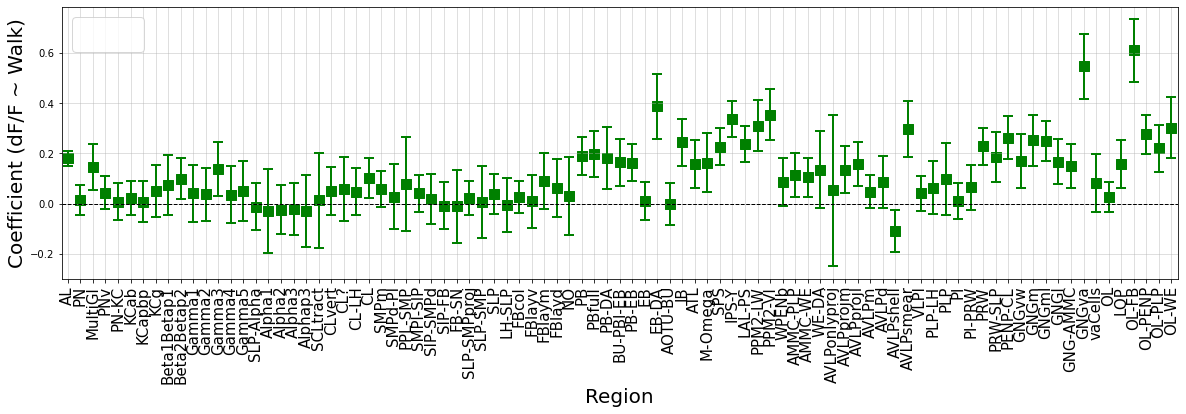

In [10]:
lin_reg = smf.ols(formula="CoefWalk ~ CompID+UAS", data=Compdf).fit()
fig, ax = plt.subplots(figsize=(20, 5))
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20    
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]

err_seriesgsum=[(a+err_series[0]) for a in err_series]

err_seriesgsum[0]=err_series[0]

coef_series=lin_reg.params.values[L2]
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]

coef_df = pd.DataFrame({'coef': coef_series,
                         'err': np.array(err_seriesgsum)[L2.astype(int)],
                        'varname': err_series.index.values[L2]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', alpha=0,
            yerr='err', 
            error_kw=dict(ecolor='g', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')

plt.xlabel('Region',fontsize=20)
plt.ylabel('Coefficient (dF/F ~ Walk)',fontsize=20)

ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='g',label="Mixed model for fly ID")
plt.grid(b=None)
_ = ax.set_xticklabels(list(CompOrder[0]), 
                      rotation=90, fontsize=15)
ax.grid(True,alpha=0.5)
ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\CoefWalkwithCompIDReg.svg')
#ax.set_xticks([])
#ax.set_yticks([])

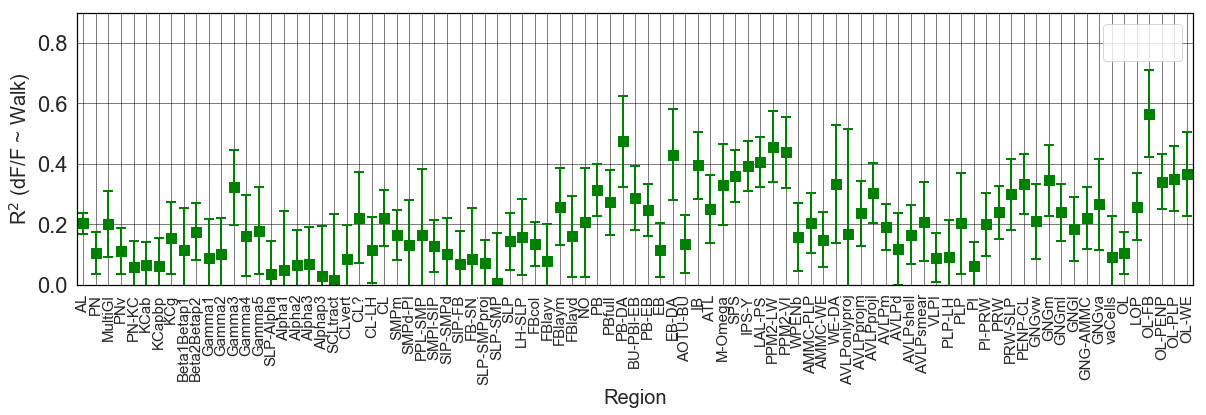

In [89]:
lin_reg = smf.ols(formula="R2Walk ~ CompID+UAS", data=Compdf).fit()
fig, ax = plt.subplots(figsize=(20, 5))
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20    
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]

err_seriesgsum=[(a+err_series[0]) for a in err_series]

err_seriesgsum[0]=err_series[0]

coef_series=lin_reg.params.values[L2]
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]

coef_df = pd.DataFrame({'coef': coef_series,
                         'err': np.array(err_seriesgsum)[L2.astype(int)],
                        'varname': err_series.index.values[L2]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none' ,alpha=0,
            yerr='err', 
            error_kw=dict(ecolor='g', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')


plt.xlabel('Region',fontsize=20)
plt.ylabel('R$^2$ (dF/F ~ Walk)',fontsize=20)

ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='g',label="Mixed model for fly ID")
plt.grid(b=None)
_ = ax.set_xticklabels(list(CompOrder[0]), 
                      rotation=90, fontsize=15)
plt.ylim([0,0.9])
ax.grid(True,alpha=0.5)

plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\R2WalkwithCompIDReg.svg')


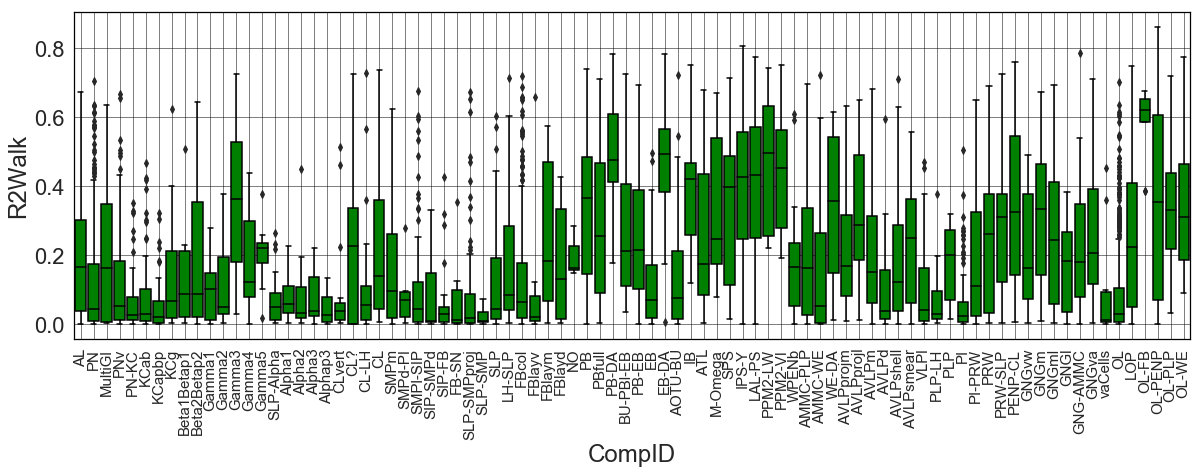

In [14]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(20, 6))
df3=Compdf
df3=df3.query('R2Walk!=0')
df3=df3[df3['R2Walk'].notna()]
#df3=df3.dropna()
#df3=df3.query('GAL4=="Nsyb" or GAL4=="GMR57C10"')
df3=df3[df3['R2Walk'].astype(bool)]
df3=df3.groupby('CompID').filter(lambda x : len(x)>3)

NewOrder=[]

for i in range(len(list(CompOrder[0]))):
    if list(CompOrder[0])[i] in df3['CompID'].unique():
        NewOrder.append(list(CompOrder[0])[i])


b = sns.boxplot(x='CompID',y='R2Walk',data=df3,color='g',order=NewOrder)
for i,box in enumerate(b.artists):
    box.set_edgecolor('black')
    box.set_facecolor('green')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         b.lines[j].set_color('black')

plt.xticks(rotation=90)
plt.xticks(fontsize=15)
b.grid(True,alpha=0.5)
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\R2CompAllWalk.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

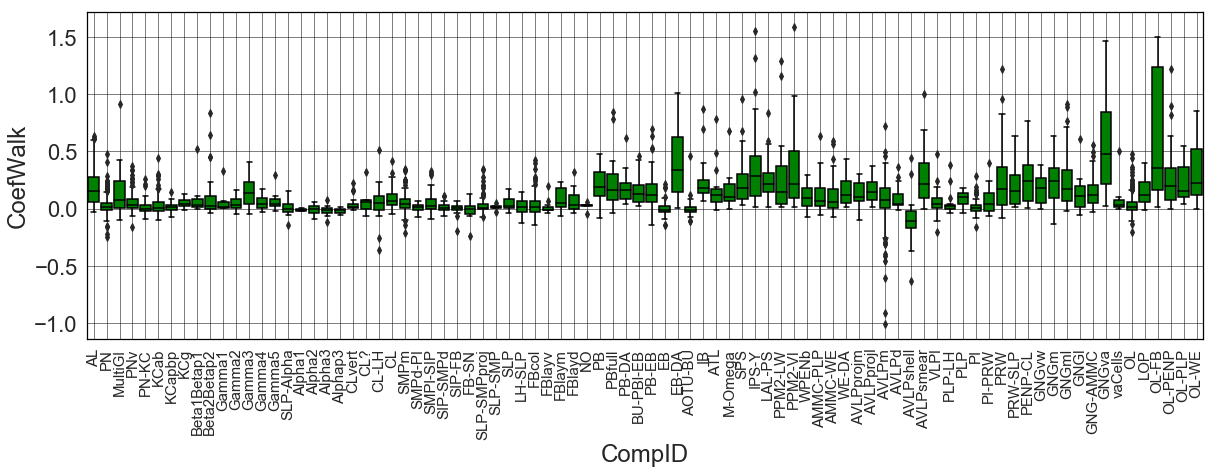

In [15]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(20, 6))
df3=Compdf
df3=df3.query('R2Walk!=0')
df3=df3[df3['R2Walk'].notna()]
#df3=df3.dropna()
#df3=df3.query('GAL4=="Nsyb" or GAL4=="GMR57C10"')
df3=df3[df3['R2Walk'].astype(bool)]
df3=df3.groupby('CompID').filter(lambda x : len(x)>3)

NewOrder=[]

for i in range(len(list(CompOrder[0]))):
    if list(CompOrder[0])[i] in df3['CompID'].unique():
        NewOrder.append(list(CompOrder[0])[i])


b = sns.boxplot(x='CompID',y='CoefWalk',data=df3,color='g',order=NewOrder)
for i,box in enumerate(b.artists):
    box.set_edgecolor('black')
    box.set_facecolor('green')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         b.lines[j].set_color('black')
   

plt.xticks(rotation=90)
plt.xticks(fontsize=15)

b.grid(True,alpha=0.5)
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\CoefCompAllWalk.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

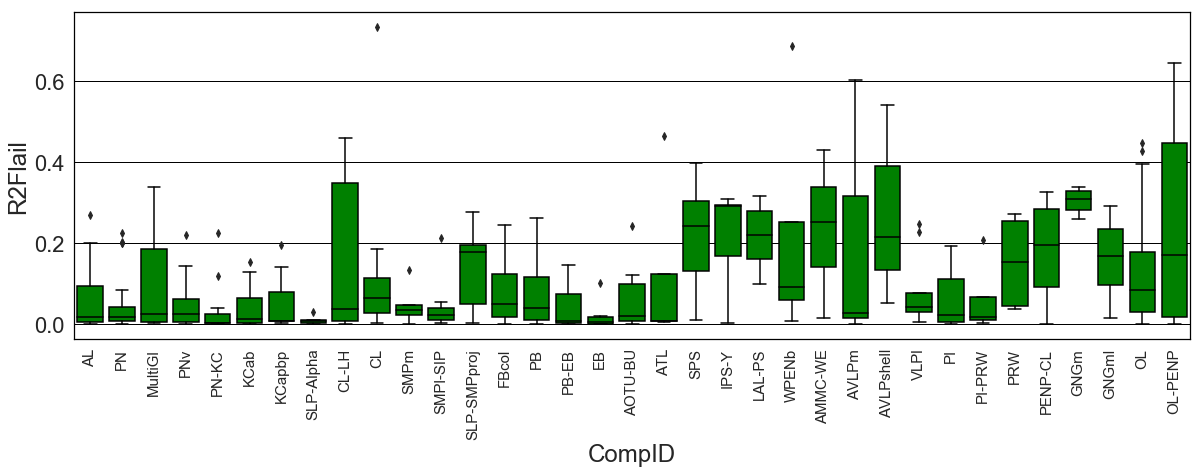

In [16]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(20, 6))
df3=Compdf
df3=df3.query('R2Flail!=0')
df3=df3[df3['R2Flail'].notna()]
#df3=df3.dropna()
#df3=df3.query('GAL4=="Nsyb" or GAL4=="GMR57C10"')
df3=df3[df3['R2Flail'].astype(bool)]
df3=df3.groupby('CompID').filter(lambda x : len(x)>3)

NewOrder=[]

for i in range(len(list(CompOrder[0]))):
    if list(CompOrder[0])[i] in df3['CompID'].unique():
        NewOrder.append(list(CompOrder[0])[i])


b = sns.boxplot(x='CompID',y='R2Flail',data=df3,color='g',order=NewOrder)
for i,box in enumerate(b.artists):
    box.set_edgecolor('black')
    box.set_facecolor('green')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         b.lines[j].set_color('black')
   

plt.xticks(rotation=90)
plt.xticks(fontsize=15)


plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\R2CompAllFlail.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

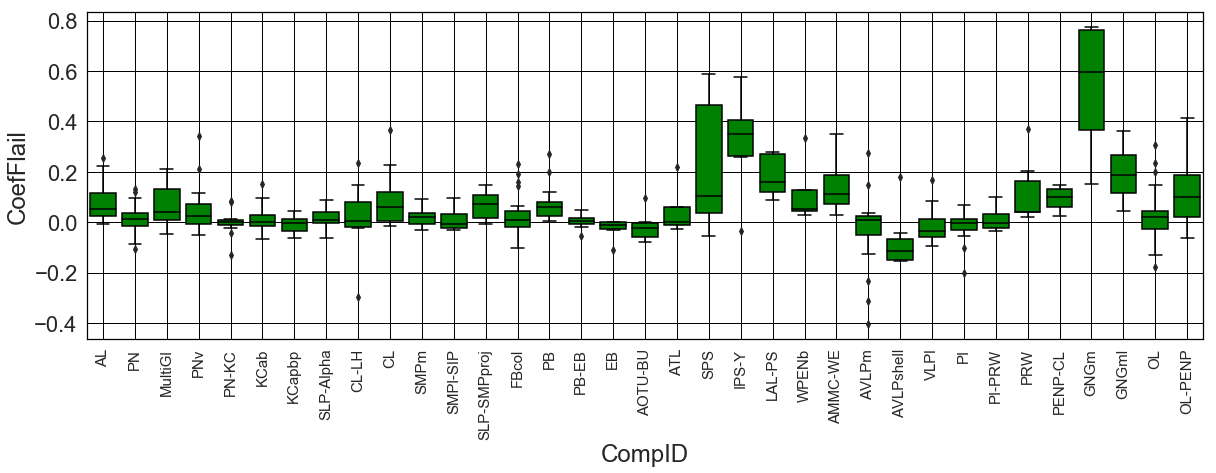

In [17]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(20, 6))
df3=Compdf
df3=df3.query('R2Flail!=0')
df3=df3[df3['R2Flail'].notna()]
#df3=df3.dropna()
#df3=df3.query('GAL4=="Nsyb" or GAL4=="GMR57C10"')
df3=df3[df3['R2Flail'].astype(bool)]
df3=df3.groupby('CompID').filter(lambda x : len(x)>3)

NewOrder=[]

for i in range(len(list(CompOrder[0]))):
    if list(CompOrder[0])[i] in df3['CompID'].unique():
        NewOrder.append(list(CompOrder[0])[i])


b = sns.boxplot(x='CompID',y='CoefFlail',data=df3,color='g',order=NewOrder)
for i,box in enumerate(b.artists):
    box.set_edgecolor('black')
    box.set_facecolor('green')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         b.lines[j].set_color('black')
   

plt.xticks(rotation=90)
plt.xticks(fontsize=15)
b.grid(True)

plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\CoefCompAllFlail.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

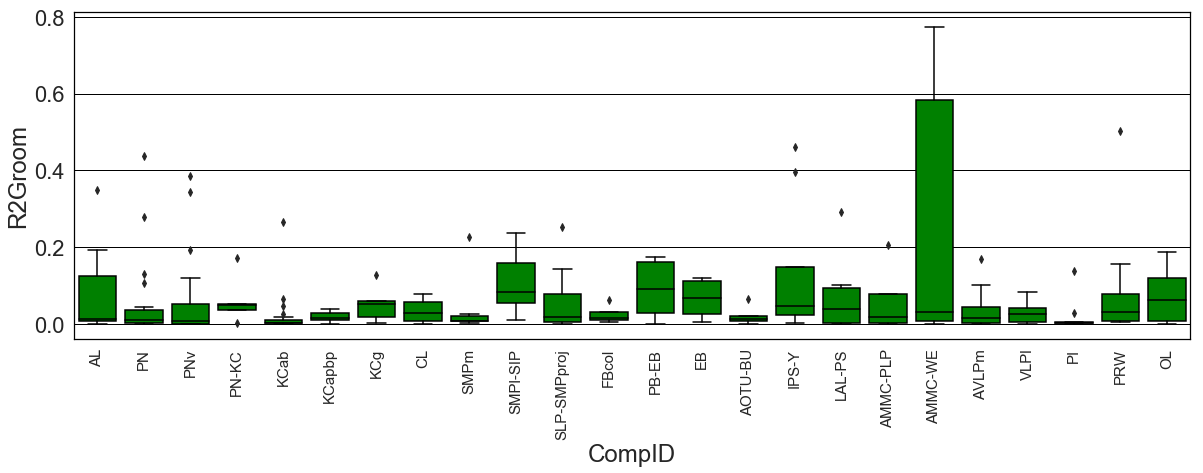

In [18]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(20, 6))
df3=Compdf
df3=df3.query('R2Groom!=0')
df3=df3[df3['R2Groom'].notna()]
#df3=df3.dropna()
#df3=df3.query('GAL4=="Nsyb" or GAL4=="GMR57C10"')
df3=df3[df3['R2Groom'].astype(bool)]
df3=df3.groupby('CompID').filter(lambda x : len(x)>3)

NewOrder=[]

for i in range(len(list(CompOrder[0]))):
    if list(CompOrder[0])[i] in df3['CompID'].unique():
        NewOrder.append(list(CompOrder[0])[i])


b = sns.boxplot(x='CompID',y='R2Groom',data=df3,color='g',order=NewOrder)
for i,box in enumerate(b.artists):
    box.set_edgecolor('black')
    box.set_facecolor('green')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         b.lines[j].set_color('black')
   

plt.xticks(rotation=90)
plt.xticks(fontsize=15)


plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\R2CompAllGroom.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

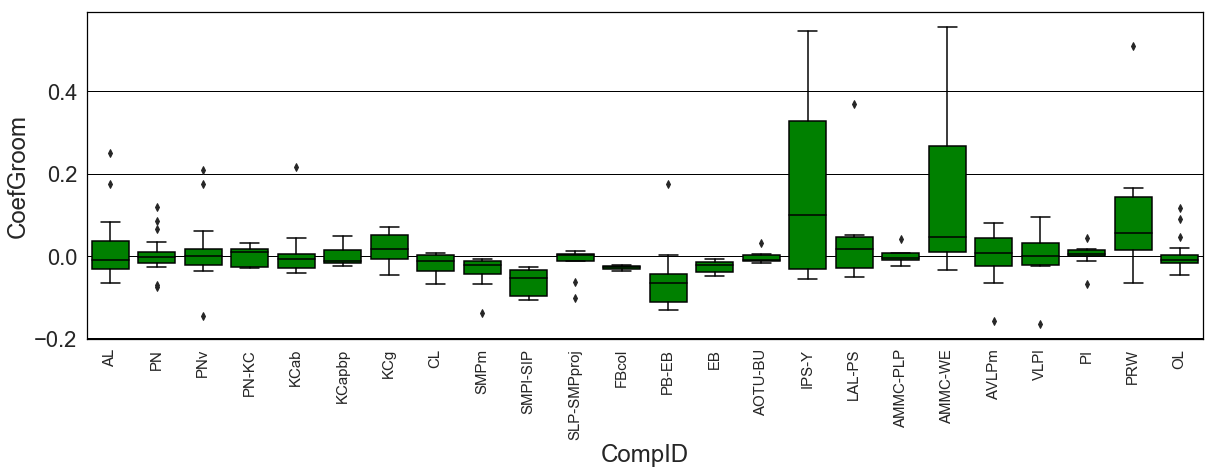

In [19]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(20, 6))
df3=Compdf
df3=df3.query('R2Groom!=0')
df3=df3[df3['R2Groom'].notna()]
#df3=df3.dropna()
#df3=df3.query('GAL4=="Nsyb" or GAL4=="GMR57C10"')
df3=df3[df3['R2Groom'].astype(bool)]
df3=df3.groupby('CompID').filter(lambda x : len(x)>3)

NewOrder=[]

for i in range(len(list(CompOrder[0]))):
    if list(CompOrder[0])[i] in df3['CompID'].unique():
        NewOrder.append(list(CompOrder[0])[i])


b = sns.boxplot(x='CompID',y='CoefGroom',data=df3,color='g',order=NewOrder)
for i,box in enumerate(b.artists):
    box.set_edgecolor('black')
    box.set_facecolor('green')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         b.lines[j].set_color('black')
   

plt.xticks(rotation=90)
plt.xticks(fontsize=15)


plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\CoefCompAllGroom.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

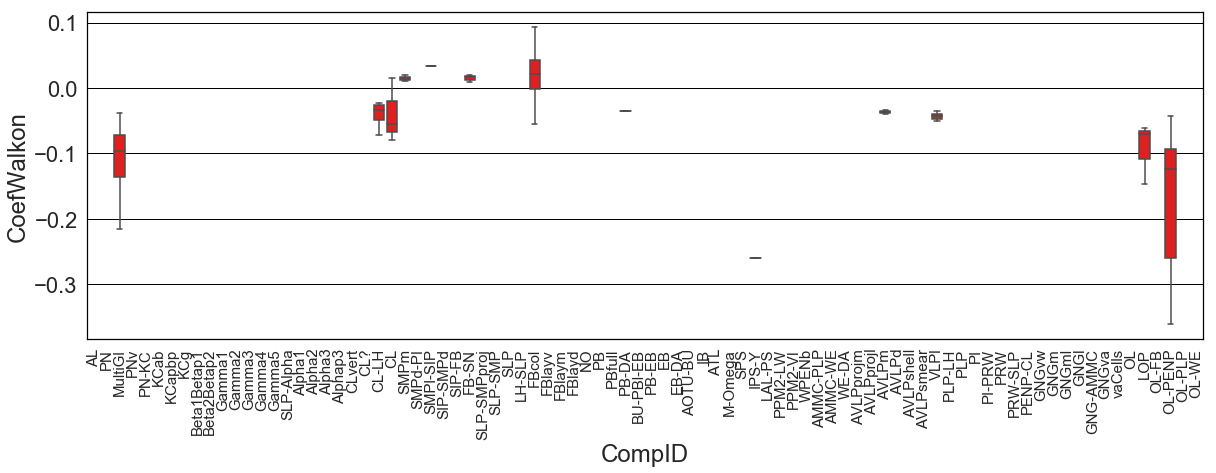

In [20]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(20, 6))
df3=Compdf
df3=df3.query('R2Walk!=0')
df3=df3[df3['R2Walk'].notna()]
#df3=df3.dropna()
#df3=df3.query('GAL4=="Nsyb" or GAL4=="GMR57C10"')
df3=df3[df3['R2Walk'].astype(bool)]
df3=df3.groupby('CompID').filter(lambda x : len(x)>3)

NewOrder=[]

for i in range(len(list(CompOrder[0]))):
    if list(CompOrder[0])[i] in df3['CompID'].unique():
        NewOrder.append(list(CompOrder[0])[i])


#b = sns.boxplot(x='CompID',y='CoefWalk',data=df3,color='g', showfliers = False,order=NewOrder)
#for i,box in enumerate(b.artists):
   # box.set_edgecolor('black')
   # box.set_facecolor('green')

    # iterate over whiskers and median lines
   # for j in range(6*i,6*(i+1)):
      #   b.lines[j].set_color('black')  
b = sns.boxplot(x='CompID',y='CoefWalkon',data=df3,color='r', showfliers = False,order=NewOrder)
plt.xticks(rotation=90)
plt.xticks(fontsize=15)


plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\CoefCompAllWalkon.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

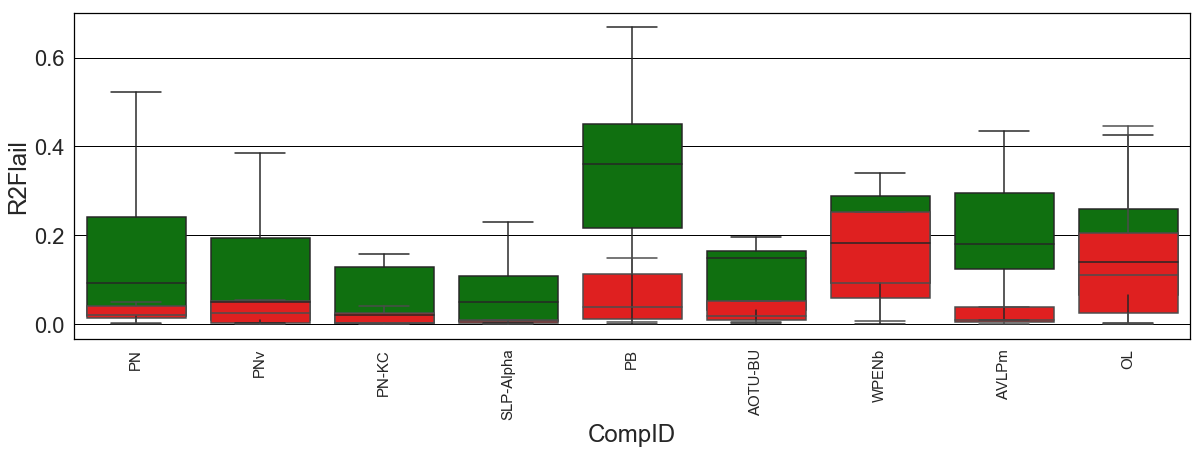

In [21]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(20, 6))
df3=Compdf
df3=df3.query('R2Flail!=0 and GAL4=="Vglut"')
df3=df3[df3['R2Flail'].notna()]
#df3=df3.dropna()
#df3=df3.query('GAL4=="Nsyb" or GAL4=="GMR57C10"')
df3=df3[df3['R2Walk'].astype(bool)]
df3=df3.groupby('CompID').filter(lambda x : len(x)>3)

NewOrder=[]

for i in range(len(list(CompOrder[0]))):
    if list(CompOrder[0])[i] in df3['CompID'].unique():
        NewOrder.append(list(CompOrder[0])[i])


#b = sns.boxplot(x='CompID',y='CoefWalk',data=df3,color='g', showfliers = False,order=NewOrder)
#for i,box in enumerate(b.artists):
   # box.set_edgecolor('black')
   # box.set_facecolor('green')

    # iterate over whiskers and median lines
   # for j in range(6*i,6*(i+1)):
      #   b.lines[j].set_color('black')  
b = sns.boxplot(x='CompID',y='R2Walk',data=Compdf[Compdf['GAL4']=='Vglut'],color='g', showfliers = False,order=NewOrder)
b = sns.boxplot(x='CompID',y='R2Flail',data=df3,color='r', showfliers = False,order=NewOrder)

plt.xticks(rotation=90)
plt.xticks(fontsize=15)


#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\CoefCompAllFlail.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

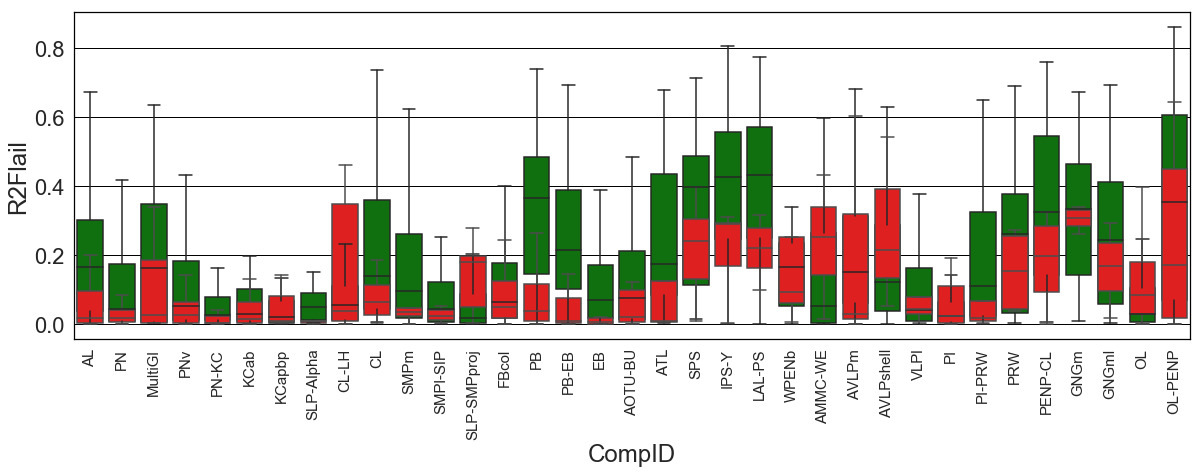

In [22]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(20, 6))
df3=Compdf
df3=df3.query('R2Flail!=0')
df3=df3[df3['R2Flail'].notna()]
#df3=df3.dropna()
#df3=df3.query('GAL4=="Nsyb" or GAL4=="GMR57C10"')
df3=df3[df3['R2Walk'].astype(bool)]
df3=df3.groupby('CompID').filter(lambda x : len(x)>3)

NewOrder=[]

for i in range(len(list(CompOrder[0]))):
    if list(CompOrder[0])[i] in df3['CompID'].unique():
        NewOrder.append(list(CompOrder[0])[i])


#b = sns.boxplot(x='CompID',y='CoefWalk',data=df3,color='g', showfliers = False,order=NewOrder)
#for i,box in enumerate(b.artists):
   # box.set_edgecolor('black')
   # box.set_facecolor('green')

    # iterate over whiskers and median lines
   # for j in range(6*i,6*(i+1)):
      #   b.lines[j].set_color('black')  
b = sns.boxplot(x='CompID',y='R2Walk',data=Compdf,color='g', showfliers = False,order=NewOrder)
b = sns.boxplot(x='CompID',y='R2Flail',data=df3,color='r', showfliers = False,order=NewOrder)

plt.xticks(rotation=90)
plt.xticks(fontsize=15)


#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\CoefCompAllFlail.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

In [23]:
df=df3
L=len(NewOrder)
pval=np.ones(L)

i=0
for compid in NewOrder:
    df2=df.loc[df['CompID']==compid]
    pval[i]=scipy.stats.wilcoxon(df2['CoefWalk']).pvalue
    i=i+1
    
pvalcorr=sm.stats.multitest.multipletests(pval, alpha=0.05, method='hs', is_sorted=False, returnsorted=False)

i=0
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\CoefCompWalkAlltoZero.txt', 'w') as f:
    for compid in NewOrder:
        f.write(compid)
        f.write(':') 
        f.write(str(pvalcorr[1][i]))        
        f.write('\n')
        print(compid)
        print(pvalcorr[1][i])
        i=i+1
        
        


AL
0.044691453879669885
PN
4.248822068841918e-06
MultiGl
0.3621060620148975
PNv
0.0026346858394977746
PN-KC
0.13887260871115703
KCab
0.13887260871115703
KCapbp
0.3621060620148975
SLP-Alpha
0.3621060620148975
CL-LH
0.35045364918089494
CL
0.058183644169733206
SMPm
0.4301763263785521
SMPl-SIP
0.4301763263785521
SLP-SMPproj
0.3621060620148975
FBcol
0.23747614331021483
PB
0.044691453879669885
PB-EB
0.23747614331021483
EB
0.3621060620148975
AOTU-BU
0.3621060620148975
ATL
0.4301763263785521
SPS
0.23747614331021483
IPS-Y
0.29131969641067945
LAL-PS
0.3621060620148975
WPENb
0.4301763263785521
AMMC-WE
0.23747614331021483
AVLPm
0.044691453879669885
AVLPshell
0.29131969641067945
VLPl
0.16903829451815733
PI
0.010872134447053705
PI-PRW
0.4301763263785521
PRW
0.3621060620148975
PENP-CL
0.4301763263785521
GNGm
0.4301763263785521
GNGml
0.4301763263785521
OL
0.0
OL-PENP
0.044691453879669885


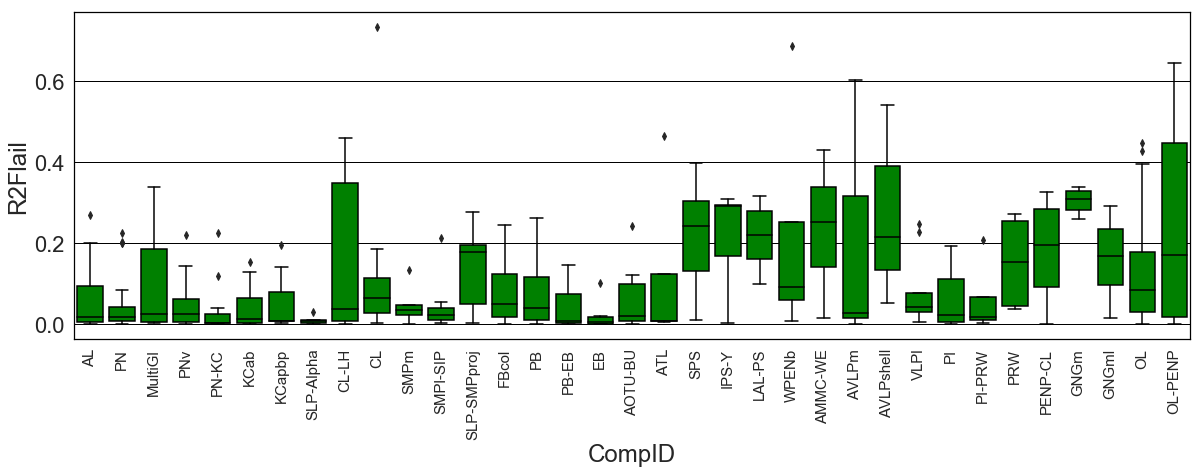

In [24]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(20, 6))
df3=Compdf
df3=df3.query('R2Flail!=0')
df3=df3[df3['R2Flail'].notna()]
#df3=df3.dropna()
#df3=df3.query('GAL4=="Nsyb" or GAL4=="GMR57C10"')
df3=df3[df3['R2Flail'].astype(bool)]
df3=df3.groupby('CompID').filter(lambda x : len(x)>3)

NewOrder=[]

for i in range(len(list(CompOrder[0]))):
    if list(CompOrder[0])[i] in df3['CompID'].unique():
        NewOrder.append(list(CompOrder[0])[i])


b = sns.boxplot(x='CompID',y='R2Flail',data=df3,color='g',order=NewOrder)
for i,box in enumerate(b.artists):
    box.set_edgecolor('black')
    box.set_facecolor('green')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         b.lines[j].set_color('black')
   

plt.xticks(rotation=90)
plt.xticks(fontsize=15)


plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\R2CompAllFlail.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

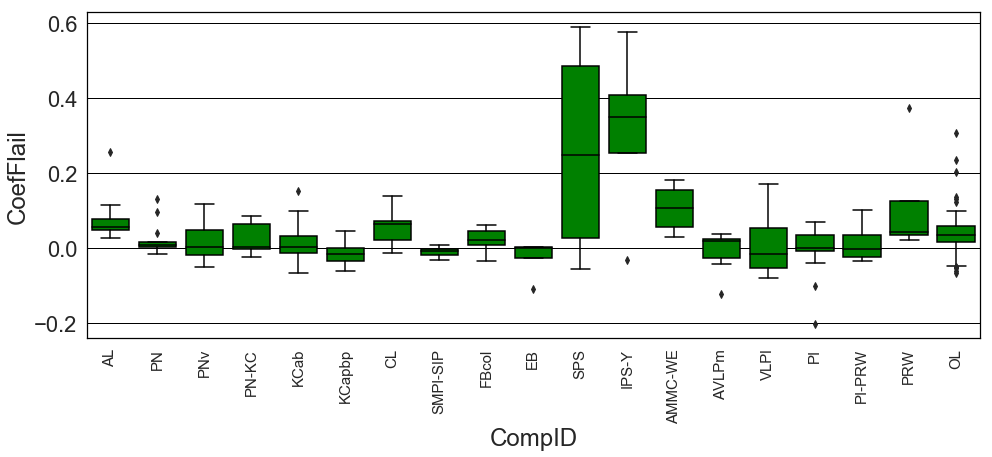

In [25]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))
df3=Compdf
df3=df3.query('R2Flail!=0')
df3=df3[df3['R2Flail'].notna()]
#df3=df3.dropna()
df3=df3.query('GAL4=="Nsyb" or GAL4=="GMR57C10"')
df3=df3[df3['R2Flail'].astype(bool)]
df3=df3.groupby('CompID').filter(lambda x : len(x)>3)

NewOrder=[]

for i in range(len(list(CompOrder[0]))):
    if list(CompOrder[0])[i] in df3['CompID'].unique():
        NewOrder.append(list(CompOrder[0])[i])


b = sns.boxplot(x='CompID',y='CoefFlail',data=df3,color='g',order=NewOrder)
for i,box in enumerate(b.artists):
    box.set_edgecolor('black')
    box.set_facecolor('green')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         b.lines[j].set_color('black')
   

plt.xticks(rotation=90)
plt.xticks(fontsize=15)


plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\CoefCompPANFlail.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

In [26]:
df=df3
L=len(NewOrder)
pval=np.ones(L)

i=0
for compid in NewOrder:
    df2=df.loc[df['CompID']==compid]
    pval[i]=scipy.stats.wilcoxon(df2['CoefFlail']).pvalue
    i=i+1
    
pvalcorr=sm.stats.multitest.multipletests(pval, alpha=0.05, method='hs', is_sorted=False, returnsorted=False)

i=0
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\CoefCompFlailAlltoZero.txt', 'w') as f:
    for compid in NewOrder:
        f.write(compid)
        f.write(':') 
        f.write(str(pvalcorr[1][i]))        
        f.write('\n')
        print(compid)
        print(pvalcorr[1][i])
        i=i+1
        
        


AL
0.19118254535060164
PN
0.8194963969855764
PNv
0.9893249832337104
PN-KC
0.9893249832337104
KCab
0.9893249832337104
KCapbp
0.9779453489080181
CL
0.6973445229662525
SMPl-SIP
0.9589397069164947
FBcol
0.6973445229662525
EB
0.9893249832337104
SPS
0.7982433752575847
IPS-Y
0.8194963969855764
AMMC-WE
0.6973445229662525
AVLPm
0.9994180661632935
VLPl
1.0
PI
0.9975519770259962
PI-PRW
1.0
PRW
0.6973445229662525
OL
4.800987554176572e-07


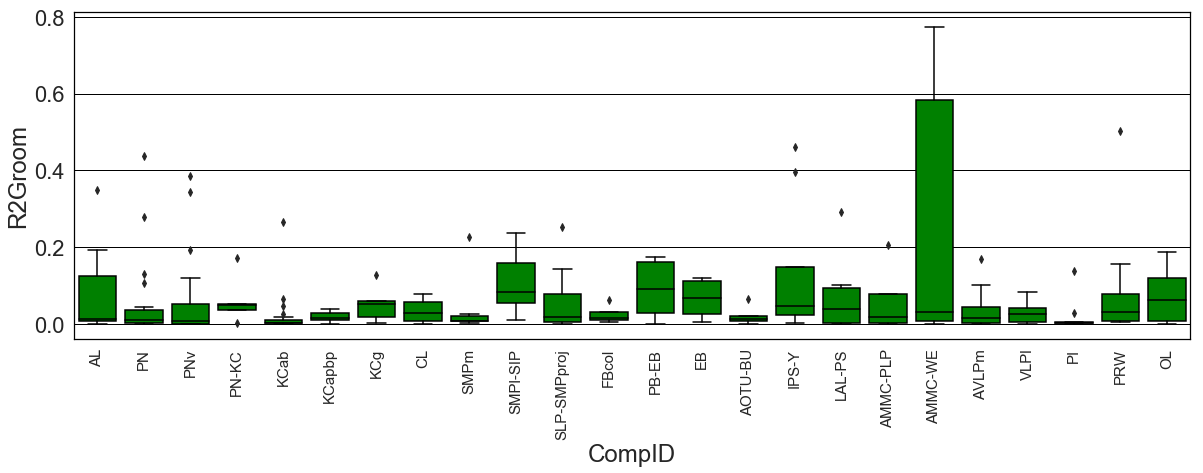

In [27]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(20, 6))
df3=Compdf
df3=df3.query('R2Groom!=0')
df3=df3[df3['R2Groom'].notna()]
#df3=df3.dropna()
#df3=df3.query('GAL4=="Nsyb" or GAL4=="GMR57C10"')
df3=df3[df3['R2Groom'].astype(bool)]
df3=df3.groupby('CompID').filter(lambda x : len(x)>3)

NewOrder=[]

for i in range(len(list(CompOrder[0]))):
    if list(CompOrder[0])[i] in df3['CompID'].unique():
        NewOrder.append(list(CompOrder[0])[i])


b = sns.boxplot(x='CompID',y='R2Groom',data=df3,color='g',order=NewOrder)
for i,box in enumerate(b.artists):
    box.set_edgecolor('black')
    box.set_facecolor('green')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         b.lines[j].set_color('black')
   

plt.xticks(rotation=90)
plt.xticks(fontsize=15)


plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\R2CompAllGroom.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

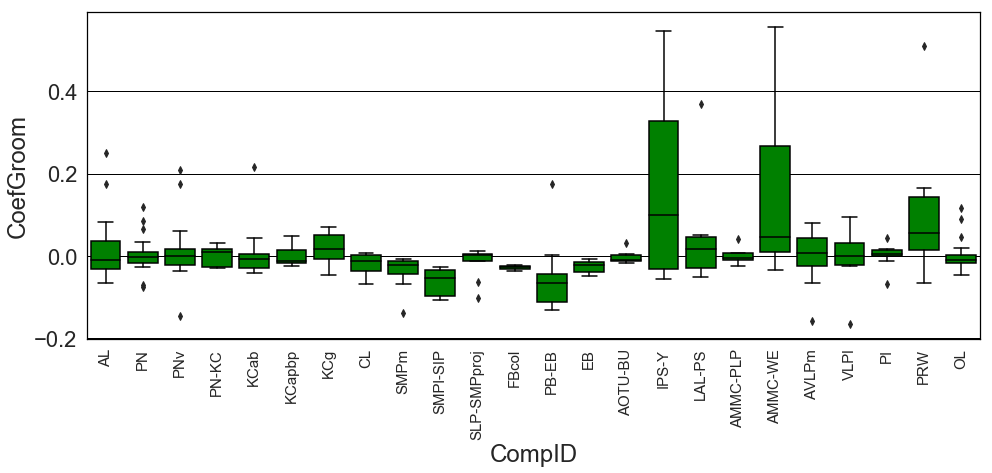

In [28]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))
df3=Compdf
df3=df3.query('R2Groom!=0')
df3=df3[df3['R2Groom'].notna()]
#df3=df3.dropna()
df3=df3.query('GAL4=="Nsyb" or GAL4=="GMR57C10"')
df3=df3[df3['R2Groom'].astype(bool)]
df3=df3.groupby('CompID').filter(lambda x : len(x)>3)

NewOrder=[]

for i in range(len(list(CompOrder[0]))):
    if list(CompOrder[0])[i] in df3['CompID'].unique():
        NewOrder.append(list(CompOrder[0])[i])


b = sns.boxplot(x='CompID',y='CoefGroom',data=df3,color='g',order=NewOrder)
for i,box in enumerate(b.artists):
    box.set_edgecolor('black')
    box.set_facecolor('green')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         b.lines[j].set_color('black')
   

plt.xticks(rotation=90)
plt.xticks(fontsize=15)


plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\CoefCompPANGroom.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

In [29]:
df=df3
L=len(NewOrder)
pval=np.ones(L)

i=0
for compid in NewOrder:
    df2=df.loc[df['CompID']==compid]
    pval[i]=scipy.stats.wilcoxon(df2['CoefGroom']).pvalue
    i=i+1
    
pvalcorr=sm.stats.multitest.multipletests(pval, alpha=0.05, method='hs', is_sorted=False, returnsorted=False)

i=0
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\CoefCompGroomAlltoZero.txt', 'w') as f:
    for compid in NewOrder:
        f.write(compid)
        f.write(':') 
        f.write(str(pvalcorr[1][i]))        
        f.write('\n')
        print(compid)
        print(pvalcorr[1][i])
        i=i+1
        
        


AL
0.9996753857177718
PN
0.9994416157360375
PNv
0.9996180746136968
PN-KC
0.9996753857177718
KCab
0.9758286720552523
KCapbp
0.9996753857177718
KCg
0.9948821650067606
CL
0.9989766443050722
SMPm
0.23565259813898298
SMPl-SIP
0.32882269664101493
SLP-SMPproj
0.9996180746136968
FBcol
0.7284823043643424
PB-EB
0.808321458545475
EB
0.4299202773153147
AOTU-BU
0.9948821650067606
IPS-Y
0.9758286720552523
LAL-PS
0.9996180746136968
AMMC-PLP
0.9996180746136968
AMMC-WE
0.35796127936269395
AVLPm
0.9996180746136968
VLPl
0.9996753857177718
PI
0.9948821650067606
PRW
0.7284823043643424
OL
0.03832980105802197


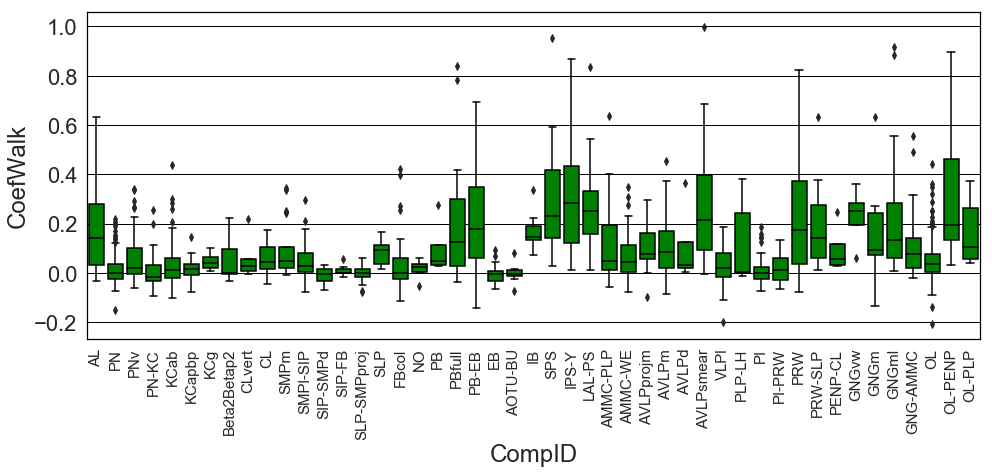

In [30]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))
df3=Compdf
df3=df3.query('CoefWalk!=0')
df3=df3[df3['CoefWalk'].notna()]
#df3=df3.dropna()
df3=df3.query('GAL4=="Nsyb" or GAL4=="GMR57C10"')
df3=df3[df3['CoefWalk'].astype(bool)]
df3=df3.groupby('CompID').filter(lambda x : len(x)>3)

NewOrder=[]

for i in range(len(list(CompOrder[0]))):
    if list(CompOrder[0])[i] in df3['CompID'].unique():
        NewOrder.append(list(CompOrder[0])[i])


b = sns.boxplot(x='CompID',y='CoefWalk',data=df3,color='g',order=NewOrder)
for i,box in enumerate(b.artists):
    box.set_edgecolor('black')
    box.set_facecolor('green')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         b.lines[j].set_color('black')
   

plt.xticks(rotation=90)
plt.xticks(fontsize=15)


plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\CoefCompPANWalk.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

In [31]:
df=df3
L=len(NewOrder)
pval=np.ones(L)

i=0
for compid in NewOrder:
    df2=df.loc[df['CompID']==compid]
    pval[i]=scipy.stats.wilcoxon(df2['CoefWalk']).pvalue
    i=i+1
    
pvalcorr=sm.stats.multitest.multipletests(pval, alpha=0.05, method='hs', is_sorted=False, returnsorted=False)

i=0
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\CoefCompWalkPANtoZero.txt', 'w') as f:
    for compid in NewOrder:
        f.write(compid)
        f.write(':') 
        f.write(str(pvalcorr[1][i]))        
        f.write('\n')
        print(compid)
        print(pvalcorr[1][i])
        i=i+1
        
        


AL
1.0061871147382107e-07
PN
0.9607522348484345
PNv
0.0024585033268038625
PN-KC
0.9988120385429532
KCab
0.20038536229096537
KCapbp
0.9607522348484345
KCg
0.07270753273849795
Beta2Betap2
0.9988120385429532
CLvert
0.7548955361705636
CL
0.3746560865244092
SMPm
0.005353637193672434
SMPl-SIP
0.13050342768526224
SIP-SMPd
0.9988120385429532
SIP-FB
0.9933092639277096
SLP-SMPproj
0.9988120385429532
SLP
0.6036672567063419
FBcol
0.8105571850195616
NO
0.9933092639277096
PB
0.7548955361705636
PBfull
0.07270753273849795
PB-EB
2.0263322133118322e-05
EB
0.9890527540170558
AOTU-BU
0.9988120385429532
IB
0.26397055575994166
SPS
0.0005037793677530322
IPS-Y
5.048912024130381e-05
LAL-PS
2.3710404540078223e-05
AMMC-PLP
0.026902755257700806
AMMC-WE
0.00738868906663015
AVLPprojm
0.5362171898079595
AVLPm
5.734775607191267e-05
AVLPd
0.7548955361705636
AVLPsmear
0.1328916827174611
VLPl
0.6023325895847917
PLP-LH
0.9607522348484345
PI
0.9988120385429532
PI-PRW
0.9747546596445232
PRW
0.0028136802360519964
PRW-SLP
0.

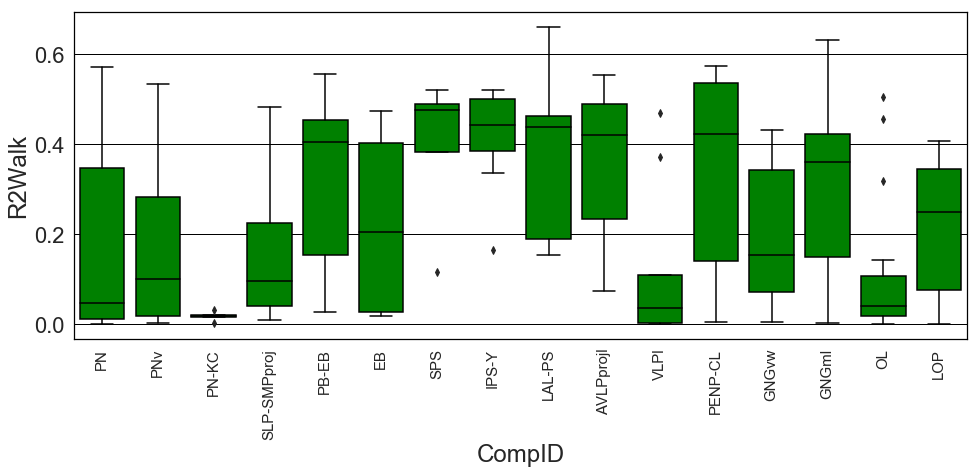

In [32]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))
df3=Compdf
df3=df3.query('R2Walk!=0')
df3=df3[df3['R2Walk'].notna()]
#df3=df3.dropna()
df3=df3.query('GAL4=="Cha"')
df3=df3[df3['R2Walk'].astype(bool)]
df3=df3.groupby('CompID').filter(lambda x : len(x)>3)

NewOrder=[]

for i in range(len(list(CompOrder[0]))):
    if list(CompOrder[0])[i] in df3['CompID'].unique():
        NewOrder.append(list(CompOrder[0])[i])


b = sns.boxplot(x='CompID',y='R2Walk',data=df3,color='g',order=NewOrder)
for i,box in enumerate(b.artists):
    box.set_edgecolor('black')
    box.set_facecolor('green')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         b.lines[j].set_color('black')
   

plt.xticks(rotation=90)
plt.xticks(fontsize=15)


plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\R2CompChaWalk.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

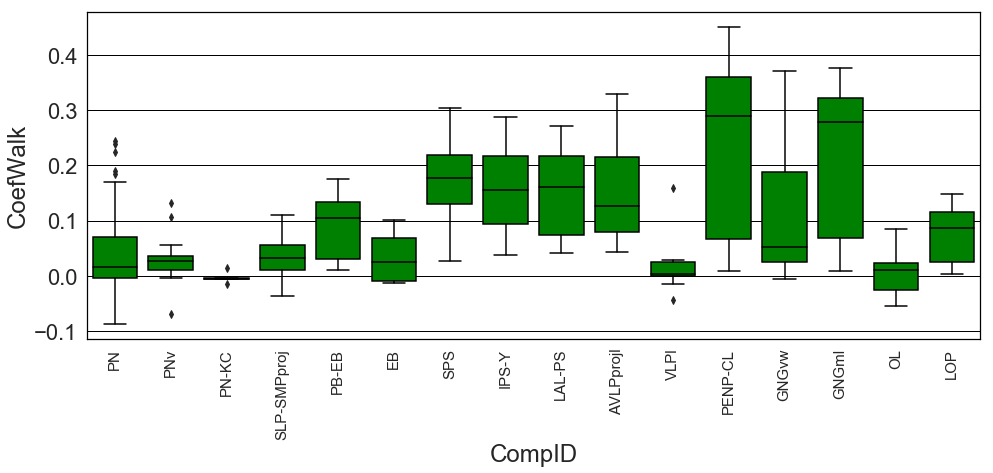

In [33]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))
df3=Compdf
df3=df3.query('CoefWalk!=0')
df3=df3[df3['CoefWalk'].notna()]
#df3=df3.dropna()
df3=df3.query('GAL4=="Cha"')
df3=df3[df3['CoefWalk'].astype(bool)]
df3=df3.groupby('CompID').filter(lambda x : len(x)>3)

NewOrder=[]

for i in range(len(list(CompOrder[0]))):
    if list(CompOrder[0])[i] in df3['CompID'].unique():
        NewOrder.append(list(CompOrder[0])[i])


b = sns.boxplot(x='CompID',y='CoefWalk',data=df3,color='g',order=NewOrder)
for i,box in enumerate(b.artists):
    box.set_edgecolor('black')
    box.set_facecolor('green')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         b.lines[j].set_color('black')
   

plt.xticks(rotation=90)
plt.xticks(fontsize=15)


plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\CoefCompChaWalk.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

In [34]:
df3=Compdf
df3=df3.query('CoefWalk!=0')
df3=df3[df3['CoefWalk'].notna()]
#df3=df3.dropna()
df3=df3.query('GAL4=="Cha"')
df3=df3[df3['CoefWalk'].astype(bool)]
df3=df3.groupby('CompID').filter(lambda x : len(x)>3)

NewOrder=[]

for i in range(len(list(CompOrder[0]))):
    if list(CompOrder[0])[i] in df3['CompID'].unique():
        NewOrder.append(list(CompOrder[0])[i])


df=df3
L=len(NewOrder)
pval=np.ones(L)

i=0
for compid in NewOrder:
    df2=df.loc[df['CompID']==compid]
    pval[i]=scipy.stats.wilcoxon(df2['CoefWalk']).pvalue
    i=i+1
    
pvalcorr=sm.stats.multitest.multipletests(pval, alpha=0.05, method='hs', is_sorted=False, returnsorted=False)

i=0
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\CoefCompWalkChatoZero.txt', 'w') as f:
    for compid in NewOrder:
        f.write(compid)
        f.write(':') 
        f.write(str(pvalcorr[1][i]))        
        f.write('\n')
        print(compid)
        print(pvalcorr[1][i])
        i=i+1
        
        


PN
0.004015781593404988
PNv
0.06942779101042773
PN-KC
0.7786878639193024
SLP-SMPproj
0.7786878639193024
PB-EB
0.059081404226708045
EB
0.7786878639193024
SPS
0.34414872645590033
IPS-Y
0.15050525227387435
LAL-PS
0.045833582519083094
AVLPprojl
0.014622366157651445
VLPl
0.7786878639193024
PENP-CL
0.045833582519083094
GNGvw
0.28292362835135054
GNGml
0.059081404226708045
OL
0.7786878639193024
LOP
0.20131737342978184


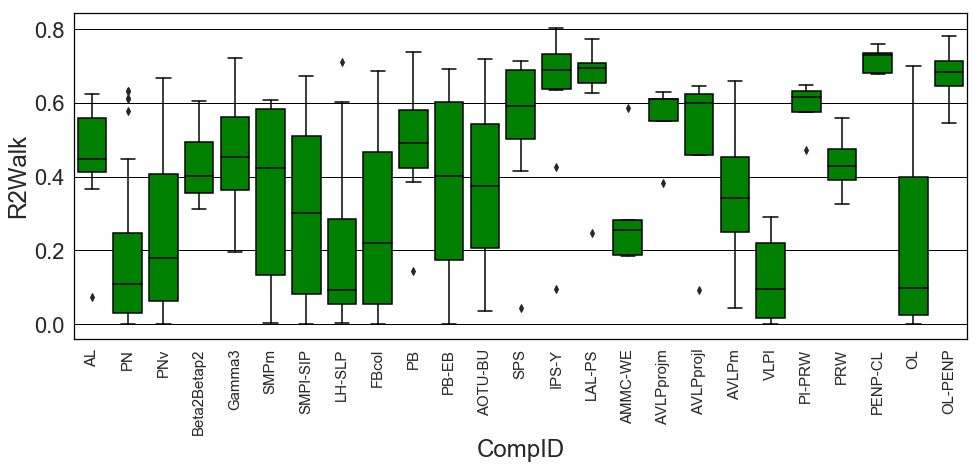

In [35]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))
df3=Compdf
df3=df3.query('R2Walk!=0')
df3=df3[df3['R2Walk'].notna()]
#df3=df3.dropna()
df3=df3.query('GAL4=="Gad"')
df3=df3[df3['R2Walk'].astype(bool)]
df3=df3.groupby('CompID').filter(lambda x : len(x)>3)

NewOrder=[]

for i in range(len(list(CompOrder[0]))):
    if list(CompOrder[0])[i] in df3['CompID'].unique():
        NewOrder.append(list(CompOrder[0])[i])


b = sns.boxplot(x='CompID',y='R2Walk',data=df3,color='g',order=NewOrder)
for i,box in enumerate(b.artists):
    box.set_edgecolor('black')
    box.set_facecolor('green')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         b.lines[j].set_color('black')
   

plt.xticks(rotation=90)
plt.xticks(fontsize=15)


plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\R2CompGadWalk.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

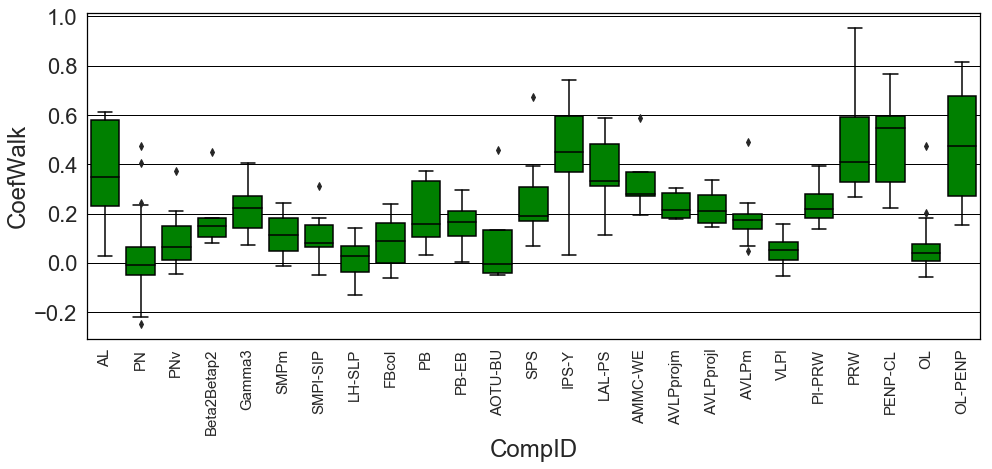

In [36]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))
df3=Compdf
df3=df3.query('CoefWalk!=0')
df3=df3[df3['CoefWalk'].notna()]
#df3=df3.dropna()
df3=df3.query('GAL4=="Gad"')
df3=df3[df3['CoefWalk'].astype(bool)]
df3=df3.groupby('CompID').filter(lambda x : len(x)>3)

NewOrder=[]

for i in range(len(list(CompOrder[0]))):
    if list(CompOrder[0])[i] in df3['CompID'].unique():
        NewOrder.append(list(CompOrder[0])[i])


b = sns.boxplot(x='CompID',y='CoefWalk',data=df3,color='g',order=NewOrder)
for i,box in enumerate(b.artists):
    box.set_edgecolor('black')
    box.set_facecolor('green')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         b.lines[j].set_color('black')
   

plt.xticks(rotation=90)
plt.xticks(fontsize=15)


plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\CoefCompGadWalk.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

In [37]:
df3=Compdf
df3=df3.query('CoefWalk!=0')
df3=df3[df3['CoefWalk'].notna()]
#df3=df3.dropna()
df3=df3.query('GAL4=="Cha"')
df3=df3[df3['CoefWalk'].astype(bool)]
df3=df3.groupby('CompID').filter(lambda x : len(x)>3)

NewOrder=[]

for i in range(len(list(CompOrder[0]))):
    if list(CompOrder[0])[i] in df3['CompID'].unique():
        NewOrder.append(list(CompOrder[0])[i])


df=df3
L=len(NewOrder)
pval=np.ones(L)

i=0
for compid in NewOrder:
    df2=df.loc[df['CompID']==compid]
    pval[i]=scipy.stats.wilcoxon(df2.groupby('FlyID').mean()['CoefWalk']).pvalue
    i=i+1
    
pvalcorr=sm.stats.multitest.multipletests(pval, alpha=0.05, method='hs', is_sorted=False, returnsorted=False)

i=0
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\CoefCompWalkChatoZero.txt', 'w') as f:
    for compid in NewOrder:
        f.write(compid)
        f.write(':') 
        f.write(str(pvalcorr[1][i]))        
        f.write('\n')
        print(compid)
        print(pvalcorr[1][i])
        i=i+1
        
        


PN
0.6454028492003832
PNv
0.5059624441662047
PN-KC
0.7139983921386457
SLP-SMPproj
0.6818223609827192
PB-EB
0.6454028492003832
EB
0.6454028492003832
SPS
0.5698591069905825
IPS-Y
0.5059624441662047
LAL-PS
0.5059624441662047
AVLPprojl
0.5059624441662047
VLPl
0.7139983921386457
PENP-CL
0.5698591069905825
GNGvw
0.6454028492003832
GNGml
0.5698591069905825
OL
0.6454028492003832
LOP
0.6454028492003832


In [38]:
#df=Regionsdf.query('GAL4=="Nsyb" or GAL4=="GMR57C10"')
#df2=df[['CoefWalk','RegionNames']]
#df2=df2.dropna()
#
df=df3
L=len(NewOrder)
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\CoefCompWalkGadtoZero.txt', 'w') as f:
    for compid in NewOrder:
        df2=df.loc[df['CompID']==compid]
        f.write(compid)
        f.write(':') 
        f.write(str(scipy.stats.wilcoxon(df2.groupby('FlyID').mean()['CoefWalk']).pvalue*L))        
        f.write(',')
        print(compid)
        print(scipy.stats.wilcoxon(df2.groupby('FlyID').mean()['CoefWalk']).pvalue*L)

PN
2.208171801098553
PNv
0.6898311485292057
PN-KC
7.443341095234269
SLP-SMPproj
5.076968125806626
PB-EB
1.7409508806487308
EB
2.875399918063996
SPS
1.0862264777892638
IPS-Y
0.6898311485292057
LAL-PS
0.6898311485292057
AVLPprojl
0.6898311485292057
VLPl
7.443341095234269
PENP-CL
1.0862264777892638
GNGvw
2.306032557056245
GNGml
1.0862264777892638
OL
1.7409508806487308
LOP
1.7409508806487308


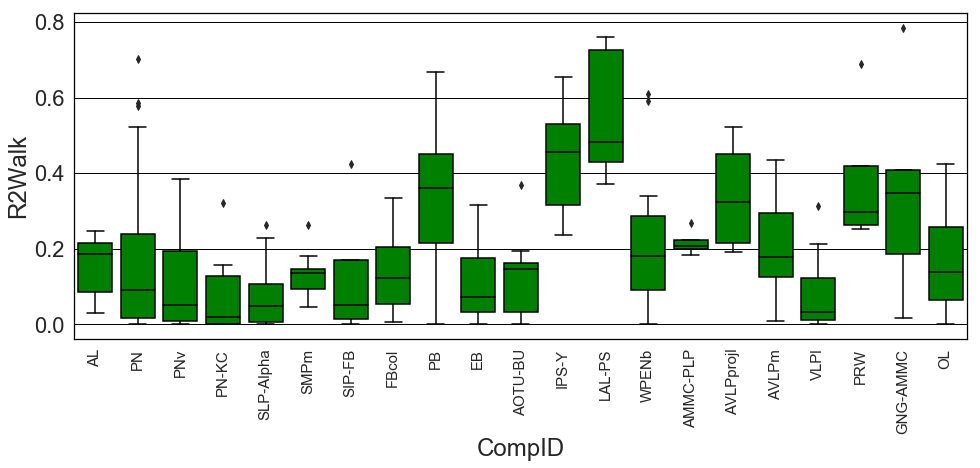

In [39]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))
df3=Compdf
df3=df3.query('R2Walk!=0')
df3=df3[df3['R2Walk'].notna()]
#df3=df3.dropna()
df3=df3.query('GAL4=="Vglut"')
df3=df3[df3['R2Walk'].astype(bool)]
df3=df3.groupby('CompID').filter(lambda x : len(x)>3)

NewOrder=[]

for i in range(len(list(CompOrder[0]))):
    if list(CompOrder[0])[i] in df3['CompID'].unique():
        NewOrder.append(list(CompOrder[0])[i])


b = sns.boxplot(x='CompID',y='R2Walk',data=df3,color='g',order=NewOrder)
for i,box in enumerate(b.artists):
    box.set_edgecolor('black')
    box.set_facecolor('green')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         b.lines[j].set_color('black')
   

plt.xticks(rotation=90)
plt.xticks(fontsize=15)


plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\R2CompVglutWalk.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

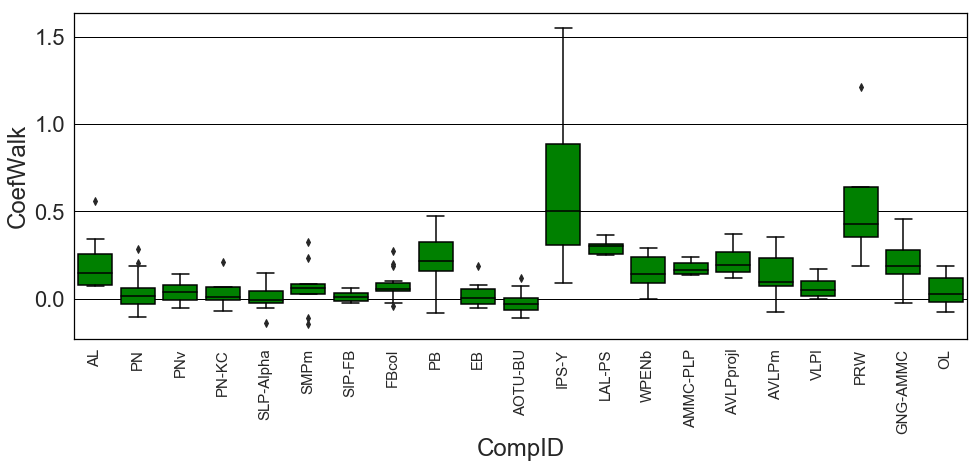

In [40]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))
df3=Compdf
df3=df3.query('CoefWalk!=0')
df3=df3[df3['CoefWalk'].notna()]
#df3=df3.dropna()
df3=df3.query('GAL4=="Vglut"')
df3=df3[df3['CoefWalk'].astype(bool)]
df3=df3.groupby('CompID').filter(lambda x : len(x)>3)

NewOrder=[]

for i in range(len(list(CompOrder[0]))):
    if list(CompOrder[0])[i] in df3['CompID'].unique():
        NewOrder.append(list(CompOrder[0])[i])


b = sns.boxplot(x='CompID',y='CoefWalk',data=df3,color='g',order=NewOrder)
for i,box in enumerate(b.artists):
    box.set_edgecolor('black')
    box.set_facecolor('green')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         b.lines[j].set_color('black')
   

plt.xticks(rotation=90)
plt.xticks(fontsize=15)


plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\CoefCompVglutWalk.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

In [41]:
#df=Regionsdf.query('GAL4=="Nsyb" or GAL4=="GMR57C10"')
#df2=df[['CoefWalk','RegionNames']]
#df2=df2.dropna()
#
df=df3
L=len(NewOrder)
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\CoefCompWalkVgluttoZero.txt', 'w') as f:
    for compid in NewOrder:
        df2=df.loc[df['CompID']==compid]
        f.write(compid)
        f.write(':') 
        f.write(str(scipy.stats.wilcoxon(df2.groupby('FlyID').mean()['CoefWalk']).pvalue*L))        
        f.write(',')
        print(compid)
        print(scipy.stats.wilcoxon(df2.groupby('FlyID').mean()['CoefWalk']).pvalue*L)

AL
1.4256722520984089
PN
1.671931830662382
PNv
4.723233564335199
PN-KC
9.769385187494978
SLP-Alpha
4.723233564335199
SMPm
4.723233564335199
SIP-FB
21.0
FBcol
0.9054033824445824
PB
0.9054033824445824
EB
4.723233564335199
AOTU-BU
12.45258205836596
IPS-Y
2.284998030851459
LAL-PS
3.773962392458995
WPENb
0.9054033824445824
AMMC-PLP
2.284998030851459
AVLPprojl
2.284998030851459
AVLPm
0.9054033824445824
VLPl
1.4256722520984089
PRW
1.4256722520984089
GNG-AMMC
3.026667731136322
OL
4.723233564335199


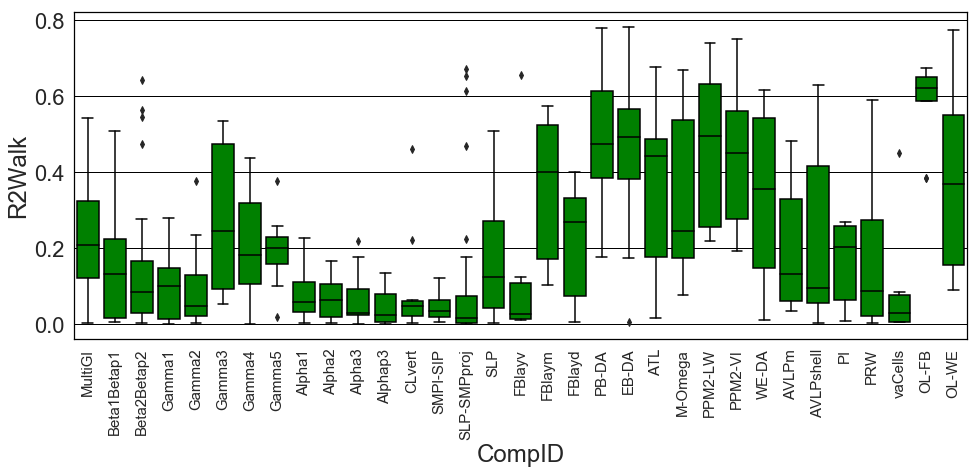

In [42]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))
df3=Compdf
df3=df3.query('R2Walk!=0')
df3=df3[df3['R2Walk'].notna()]
#df3=df3.dropna()
df3=df3.query('GAL4=="TH"')
df3=df3[df3['R2Walk'].astype(bool)]
df3=df3.groupby('CompID').filter(lambda x : len(x)>3)

NewOrder=[]

for i in range(len(list(CompOrder[0]))):
    if list(CompOrder[0])[i] in df3['CompID'].unique():
        NewOrder.append(list(CompOrder[0])[i])


b = sns.boxplot(x='CompID',y='R2Walk',data=df3,color='g',order=NewOrder)
for i,box in enumerate(b.artists):
    box.set_edgecolor('black')
    box.set_facecolor('green')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         b.lines[j].set_color('black')
   

plt.xticks(rotation=90)
plt.xticks(fontsize=15)


plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\R2CompTHWalk.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

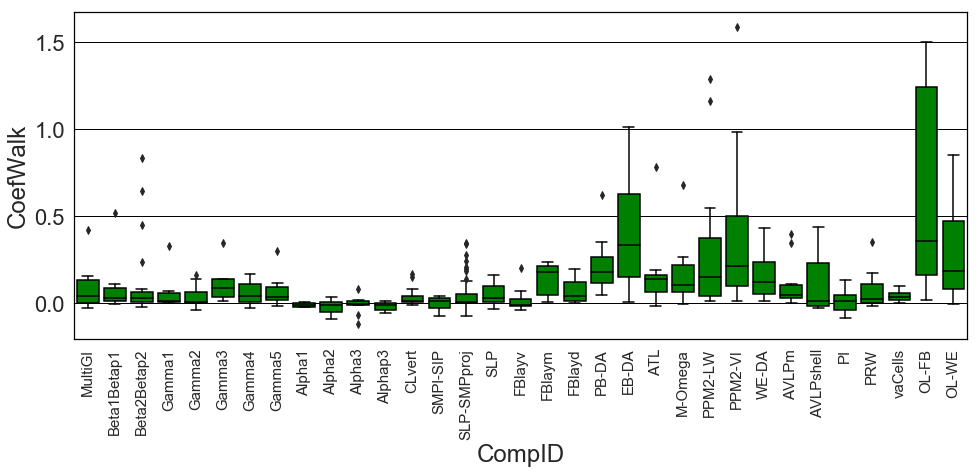

In [43]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))
df3=Compdf
df3=df3.query('CoefWalk!=0')
df3=df3[df3['CoefWalk'].notna()]
#df3=df3.dropna()
df3=df3.query('GAL4=="TH"')
df3=df3[df3['CoefWalk'].astype(bool)]
df3=df3.groupby('CompID').filter(lambda x : len(x)>3)

NewOrder=[]

for i in range(len(list(CompOrder[0]))):
    if list(CompOrder[0])[i] in df3['CompID'].unique():
        NewOrder.append(list(CompOrder[0])[i])


b = sns.boxplot(x='CompID',y='CoefWalk',data=df3,color='g',order=NewOrder)
for i,box in enumerate(b.artists):
    box.set_edgecolor('black')
    box.set_facecolor('green')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         b.lines[j].set_color('black')
   

plt.xticks(rotation=90)
plt.xticks(fontsize=15)


plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\CoefCompTHWalk.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

In [44]:
df2.groupby('FlyID').mean()['CoefWalk']

FlyID
56    0.127143
57   -0.016067
58   -0.034812
59    0.035710
60    0.126823
Name: CoefWalk, dtype: float64

In [45]:
#df=Regionsdf.query('GAL4=="Nsyb" or GAL4=="GMR57C10"')
#df2=df[['CoefWalk','RegionNames']]
#df2=df2.dropna()
#
df=df3
L=len(NewOrder)
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\CoefCompWalkTHtoZero.txt', 'w') as f:
    for compid in NewOrder:
        df2=df.loc[df['CompID']==compid]
        f.write(compid)
        f.write(':') 
        f.write(str(scipy.stats.wilcoxon(df2.groupby('FlyID').mean()['CoefWalk']).pvalue*L))        
        f.write(',')
        print(compid)
        print(scipy.stats.wilcoxon(df2.groupby('FlyID').mean()['CoefWalk']).pvalue*L)

MultiGl
2.2403421104403565
Beta1Betap1
2.466271444094122
Beta2Betap2
1.6652000841660886
Gamma1
0.1670470601668395
Gamma2
5.110374234306124
Gamma3
0.9143590288166356
Gamma4
0.9143590288166356
Gamma5
2.466271444094122
Alpha1
9.019615383645839
Alpha2
6.686513054506295
Alpha3
26.362358549869636
Alphap3
3.823099418355693
CLvert
0.9237299110269697
SMPl-SIP
23.595021604706947
SLP-SMPproj
3.001975283186806
SLP
1.9580919560699843
FBlayv
31.441245725694845
FBlaym
0.5926957583605993
FBlayd
1.4032417739357037
PB-DA
0.5926957583605993
EB-DA
0.5926957583605993
ATL
0.5001471380721619
M-Omega
0.3584534152589157
PPM2-LW
0.2536312038220377
PPM2-VI
0.1670470601668395
WE-DA
3.5907111913380074
AVLPm
1.4227767438414867
AVLPshell
23.595021604706947
PI
11.39262536847072
PRW
7.811877831049292
vaCells
2.2403421104403565
OL-FB
0.9143590288166356
OL-WE
0.9237299110269697


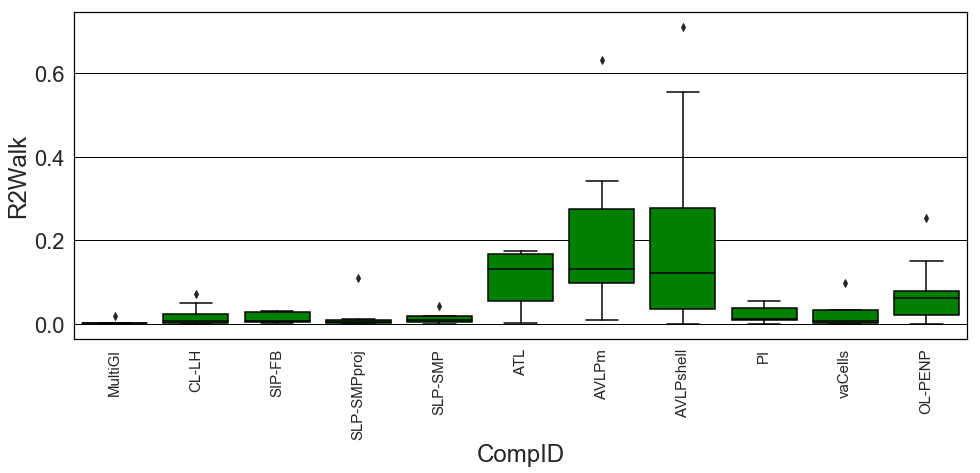

In [46]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))
df3=Compdf
df3=df3.query('R2Walk!=0')
df3=df3[df3['R2Walk'].notna()]
#df3=df3.dropna()
df3=df3.query('GAL4=="Trh"')
df3=df3[df3['R2Walk'].astype(bool)]
df3=df3.groupby('CompID').filter(lambda x : len(x)>3)

NewOrder=[]

for i in range(len(list(CompOrder[0]))):
    if list(CompOrder[0])[i] in df3['CompID'].unique():
        NewOrder.append(list(CompOrder[0])[i])


b = sns.boxplot(x='CompID',y='R2Walk',data=df3,color='g',order=NewOrder)
for i,box in enumerate(b.artists):
    box.set_edgecolor('black')
    box.set_facecolor('green')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         b.lines[j].set_color('black')
   

plt.xticks(rotation=90)
plt.xticks(fontsize=15)


plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\R2CompTrhWalk.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

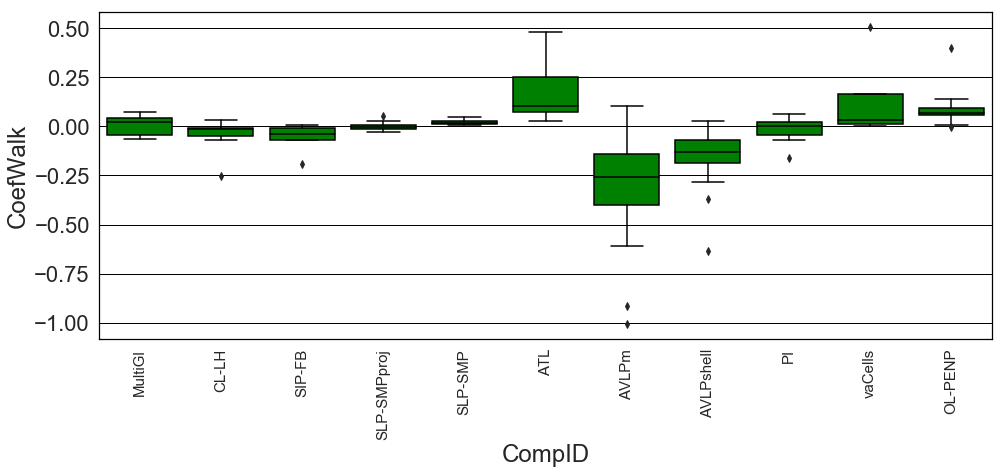

In [47]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))
df3=Compdf
df3=df3.query('CoefWalk!=0')
df3=df3[df3['CoefWalk'].notna()]
#df3=df3.dropna()
df3=df3.query('GAL4=="Trh"')
df3=df3[df3['CoefWalk'].astype(bool)]
df3=df3.groupby('CompID').filter(lambda x : len(x)>3)

NewOrder=[]

for i in range(len(list(CompOrder[0]))):
    if list(CompOrder[0])[i] in df3['CompID'].unique():
        NewOrder.append(list(CompOrder[0])[i])


b = sns.boxplot(x='CompID',y='CoefWalk',data=df3,color='g',order=NewOrder)
for i,box in enumerate(b.artists):
    box.set_edgecolor('black')
    box.set_facecolor('green')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         b.lines[j].set_color('black')
   

plt.xticks(rotation=90)
plt.xticks(fontsize=15)


plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\CoefCompTrhWalk.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

In [48]:
#df=Regionsdf.query('GAL4=="Nsyb" or GAL4=="GMR57C10"')
#df2=df[['CoefWalk','RegionNames']]
#df2=df2.dropna()
#
df=df3
L=len(NewOrder)
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\CoefCompWalkTHtoZero.txt', 'w') as f:
    for compid in NewOrder:
        df2=df.loc[df['CompID']==compid]
        f.write(compid)
        f.write(':') 
        f.write(str(scipy.stats.wilcoxon(df2.groupby('FlyID').mean()['CoefWalk']).pvalue*L))        
        f.write(',')
        print(compid)
        print(scipy.stats.wilcoxon(df2.groupby('FlyID').mean()['CoefWalk']).pvalue*L)

MultiGl
7.201929306204346
CL-LH
0.4742589146138289
SIP-FB
1.1969037304460024
SLP-SMPproj
5.11729700297356
SLP-SMP
1.9768374436689973
ATL
0.7467807034801189
AVLPm
0.5103940805799505
AVLPshell
0.19756525278686643
PI
5.11729700297356
vaCells
1.5853973829761685
OL-PENP
0.4742589146138289


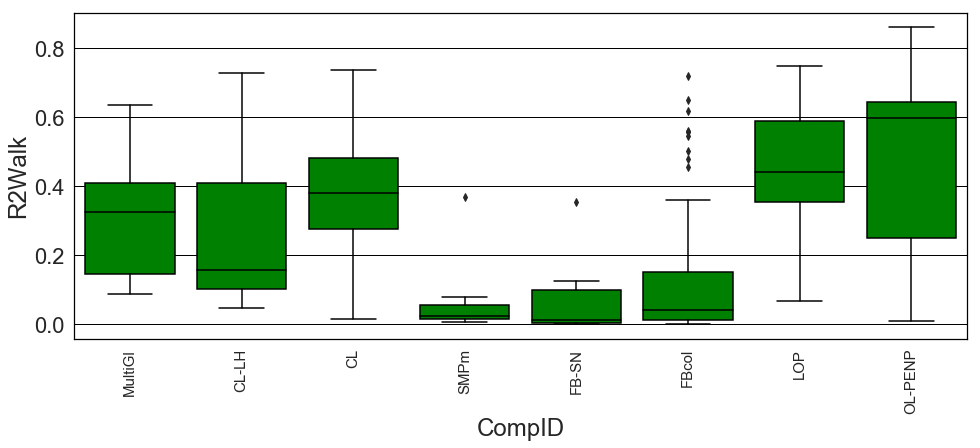

In [49]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))
df3=Compdf
df3=df3.query('R2Walk!=0')
df3=df3[df3['R2Walk'].notna()]
#df3=df3.dropna()
df3=df3.query('GAL4=="TDC"')
df3=df3[df3['R2Walk'].astype(bool)]
df3=df3.groupby('CompID').filter(lambda x : len(x)>3)

NewOrder=[]

for i in range(len(list(CompOrder[0]))):
    if list(CompOrder[0])[i] in df3['CompID'].unique():
        NewOrder.append(list(CompOrder[0])[i])


b = sns.boxplot(x='CompID',y='R2Walk',data=df3,color='g',order=NewOrder)
for i,box in enumerate(b.artists):
    box.set_edgecolor('black')
    box.set_facecolor('green')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         b.lines[j].set_color('black')
   

plt.xticks(rotation=90)
plt.xticks(fontsize=15)


plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\R2CompTDCWalk.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

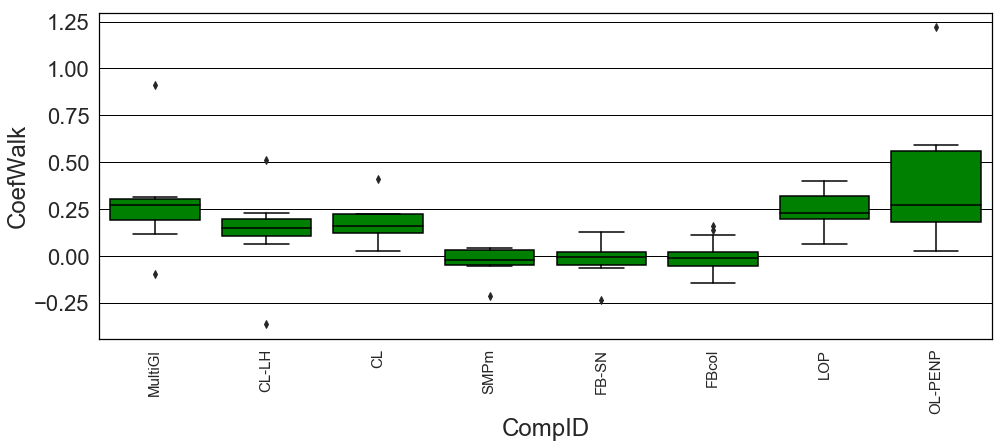

In [50]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))
df3=Compdf
df3=df3.query('CoefWalk!=0')
df3=df3[df3['CoefWalk'].notna()]
#df3=df3.dropna()
df3=df3.query('GAL4=="TDC"')
df3=df3[df3['CoefWalk'].astype(bool)]
df3=df3.groupby('CompID').filter(lambda x : len(x)>3)

NewOrder=[]

for i in range(len(list(CompOrder[0]))):
    if list(CompOrder[0])[i] in df3['CompID'].unique():
        NewOrder.append(list(CompOrder[0])[i])


b = sns.boxplot(x='CompID',y='CoefWalk',data=df3,color='g',order=NewOrder)
for i,box in enumerate(b.artists):
    box.set_edgecolor('black')
    box.set_facecolor('green')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         b.lines[j].set_color('black')
   

plt.xticks(rotation=90)
plt.xticks(fontsize=15)


plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\CoefCompTDCWalk.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

In [51]:
#df=Regionsdf.query('GAL4=="Nsyb" or GAL4=="GMR57C10"')
#df2=df[['CoefWalk','RegionNames']]
#df2=df2.dropna()
#
df=df3
L=len(NewOrder)
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\CoefCompWalkTDCtoZero.txt', 'w') as f:
    for compid in NewOrder:
        df2=df.loc[df['CompID']==compid]
        f.write(compid)
        f.write(':') 
        f.write(str(scipy.stats.wilcoxon(df2.groupby('FlyID').mean()['CoefWalk']).pvalue*L))        
        f.write(',')
        print(compid)
        print(scipy.stats.wilcoxon(df2.groupby('FlyID').mean()['CoefWalk']).pvalue*L)

MultiGl
0.34491557426460284
CL-LH
2.76184857417472
CL
1.437699959031998
SMPm
3.7216705476171343
FB-SN
5.486643475612846
FBcol
5.486643475612846
LOP
0.34491557426460284
OL-PENP
0.34491557426460284


In [52]:
len(NewOrder)

8

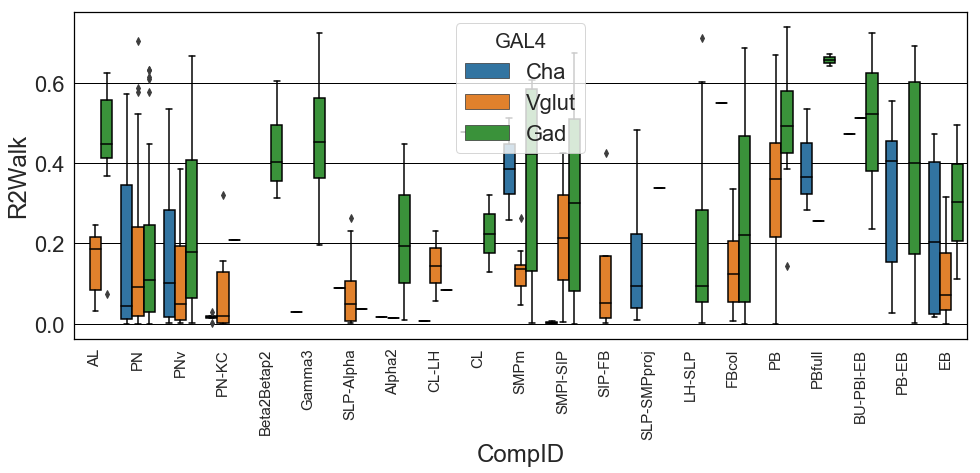

In [53]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))
df3=Compdf
df3=df3.query('R2Walk!=0').query('GAL4=="Cha" or GAL4=="Vglut" or GAL4=="Gad"')
df3=df3[df3['R2Walk'].notna()]
#df3=df3.dropna()
#df3=df3.query('GAL4=="TDC"')
df3=df3[df3['R2Walk'].astype(bool)]
df3=df3.groupby('CompID').filter(lambda x : len(x)>3)

NewOrder=[]

for i in range(len(list(CompOrder[0]))):
    if list(CompOrder[0])[i] in df3['CompID'].unique():
        NewOrder.append(list(CompOrder[0])[i])


b = sns.boxplot(x='CompID',y='R2Walk',data=df3,hue='GAL4',order=NewOrder[0:21])
for i,box in enumerate(b.artists):
    box.set_edgecolor('black')
    #box.set_facecolor('green')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         b.lines[j].set_color('black')
   

plt.xticks(rotation=90)
plt.xticks(fontsize=15)


plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\R2CompSupCCWalk.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

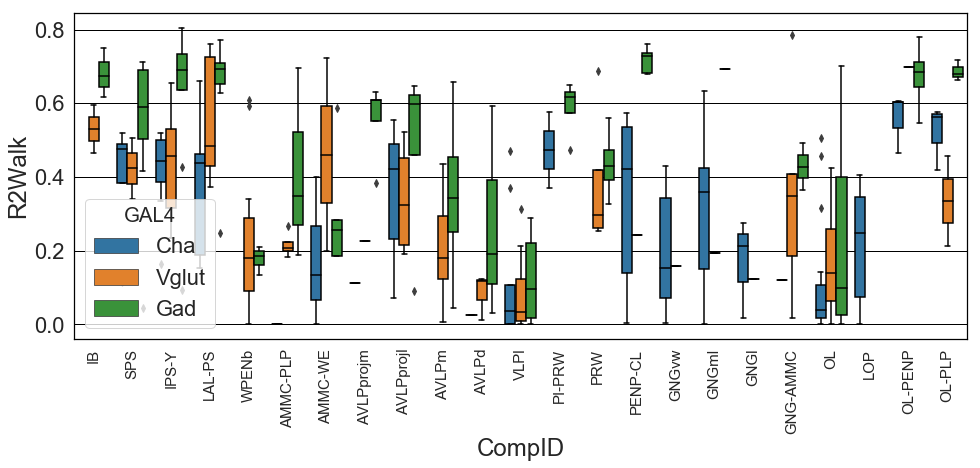

In [54]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))
df3=Compdf
df3=df3.query('R2Walk!=0').query('GAL4=="Cha" or GAL4=="Vglut" or GAL4=="Gad"')
df3=df3[df3['R2Walk'].notna()]
#df3=df3.dropna()
#df3=df3.query('GAL4=="TDC"')
df3=df3[df3['R2Walk'].astype(bool)]
df3=df3.groupby('CompID').filter(lambda x : len(x)>3)

NewOrder=[]

for i in range(len(list(CompOrder[0]))):
    if list(CompOrder[0])[i] in df3['CompID'].unique():
        NewOrder.append(list(CompOrder[0])[i])


b = sns.boxplot(x='CompID',y='R2Walk',data=df3,hue='GAL4',order=NewOrder[22:61])
for i,box in enumerate(b.artists):
    box.set_edgecolor('black')
    #box.set_facecolor('green')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         b.lines[j].set_color('black')
   

plt.xticks(rotation=90)
plt.xticks(fontsize=15)


plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\R2CompPostLatOLWalk.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

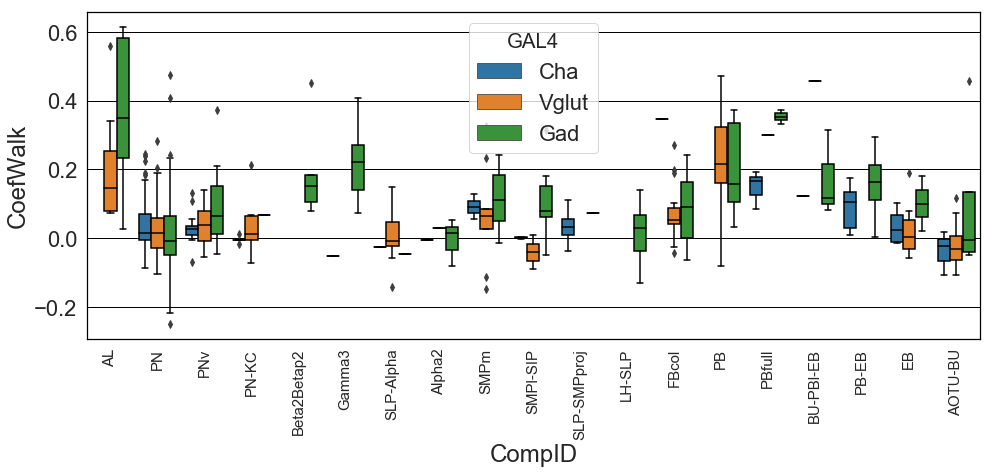

In [55]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))
df3=Compdf
df3=df3.query('R2Walk!=0').query('GAL4=="Cha" or GAL4=="Vglut" or GAL4=="Gad"')
df3=df3[df3['CoefWalk'].notna()]
#df3=df3.dropna()
#df3=df3.query('GAL4=="TDC"')
df3=df3[df3['R2Walk'].astype(bool)]
df3=df3.groupby('CompID').filter(lambda x : len(x)>4)

NewOrder=[]

for i in range(len(list(CompOrder[0]))):
    if list(CompOrder[0])[i] in df3['CompID'].unique():
        NewOrder.append(list(CompOrder[0])[i])


b = sns.boxplot(x='CompID',y='CoefWalk',data=df3,hue='GAL4',order=NewOrder[0:19])
for i,box in enumerate(b.artists):
    box.set_edgecolor('black')
    #box.set_facecolor('green')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         b.lines[j].set_color('black')
   

plt.xticks(rotation=90)
plt.xticks(fontsize=15)


plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\CoefCompSupCCWalk.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

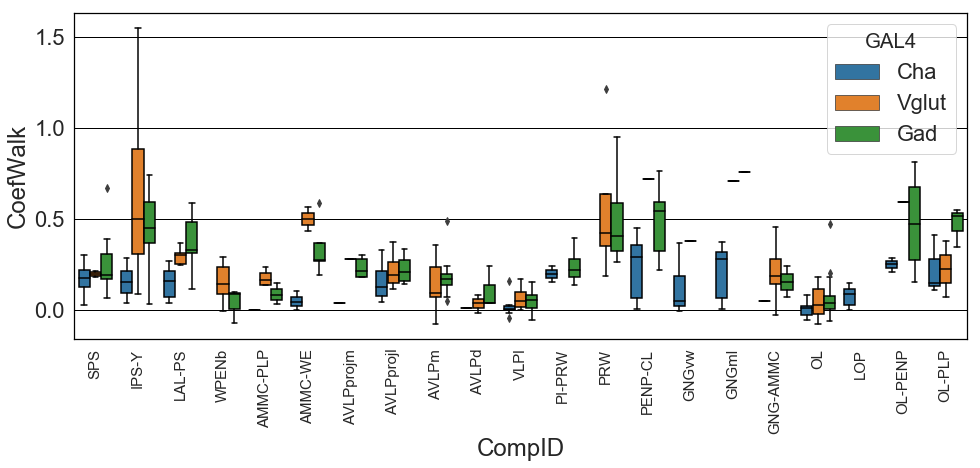

In [56]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))
df3=Compdf
df3=df3.query('R2Walk!=0').query('GAL4=="Cha" or GAL4=="Vglut" or GAL4=="Gad"')
df3=df3[df3['CoefWalk'].notna()]
#df3=df3.dropna()
#df3=df3.query('GAL4=="TDC"')
df3=df3[df3['R2Walk'].astype(bool)]
df3=df3.groupby('CompID').filter(lambda x : len(x)>4)

NewOrder=[]

for i in range(len(list(CompOrder[0]))):
    if list(CompOrder[0])[i] in df3['CompID'].unique():
        NewOrder.append(list(CompOrder[0])[i])


b = sns.boxplot(x='CompID',y='CoefWalk',data=df3,hue='GAL4',order=NewOrder[20:61])
for i,box in enumerate(b.artists):
    box.set_edgecolor('black')
    #box.set_facecolor('green')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         b.lines[j].set_color('black')
   

plt.xticks(rotation=90)
plt.xticks(fontsize=15)


plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\CoefCompSupCCWalk.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

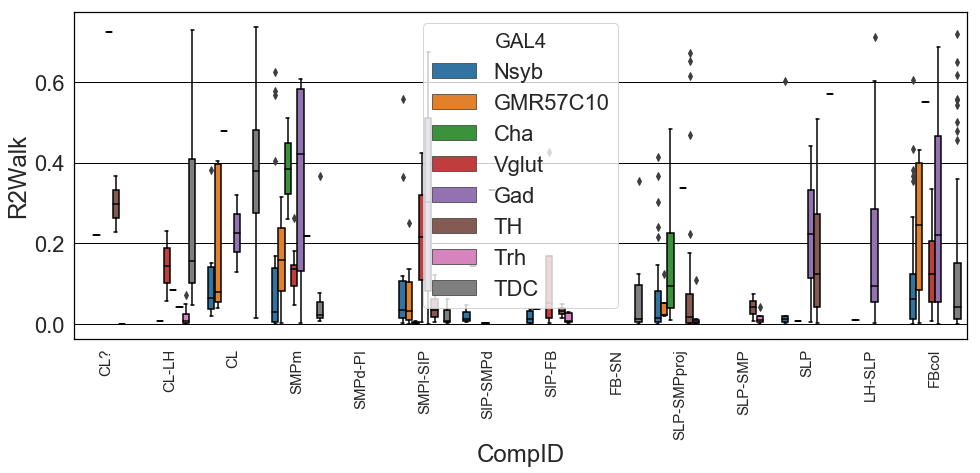

In [57]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))
df3=Compdf
df3=df3.query('R2Walk!=0')
df3=df3[df3['R2Walk'].notna()]
#df3=df3.dropna()
#df3=df3.query('GAL4=="TDC"')
df3=df3[df3['R2Walk'].astype(bool)]
df3=df3.groupby('CompID').filter(lambda x : len(x)>3)

NewOrder=[]

for i in range(len(list(CompOrder[0]))):
    if list(CompOrder[0])[i] in df3['CompID'].unique():
        NewOrder.append(list(CompOrder[0])[i])


b = sns.boxplot(x='CompID',y='R2Walk',data=df3,hue='GAL4',order=NewOrder[21:21+14])
for i,box in enumerate(b.artists):
    box.set_edgecolor('black')
    #box.set_facecolor('green')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         b.lines[j].set_color('black')
   

plt.xticks(rotation=90)
plt.xticks(fontsize=15)


plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\R2CL_SNPCompWalk.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

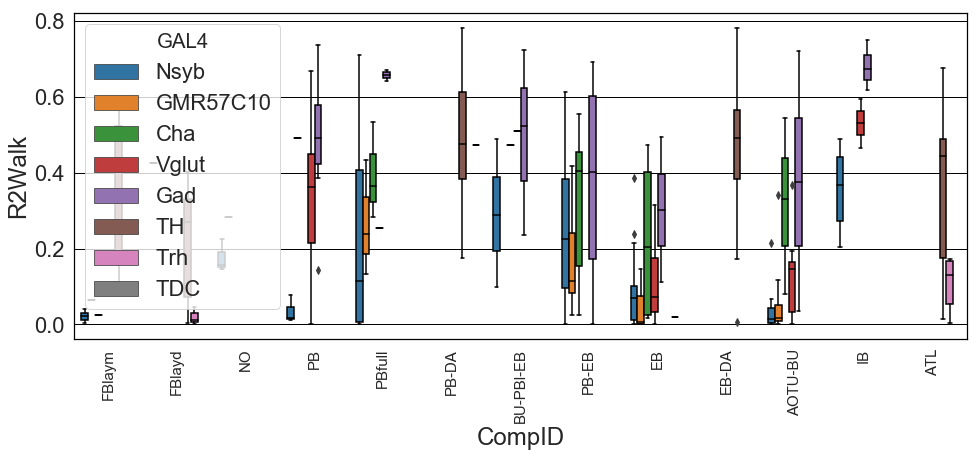

In [58]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))
df3=Compdf
df3=df3.query('R2Walk!=0')
df3=df3[df3['R2Walk'].notna()]
#df3=df3.dropna()
#df3=df3.query('GAL4=="TDC"')
df3=df3[df3['R2Walk'].astype(bool)]
df3=df3.groupby('CompID').filter(lambda x : len(x)>3)

NewOrder=[]

for i in range(len(list(CompOrder[0]))):
    if list(CompOrder[0])[i] in df3['CompID'].unique():
        NewOrder.append(list(CompOrder[0])[i])


b = sns.boxplot(x='CompID',y='R2Walk',data=df3,hue='GAL4',order=NewOrder[36:49])
for i,box in enumerate(b.artists):
    box.set_edgecolor('black')
    #box.set_facecolor('green')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         b.lines[j].set_color('black')
   

plt.xticks(rotation=90)
plt.xticks(fontsize=15)


plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\R2_CC_CompWalk.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

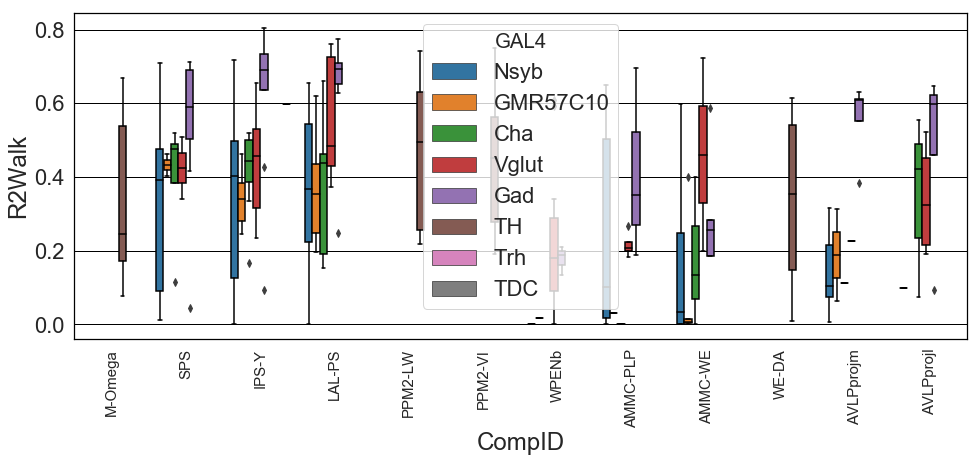

In [59]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))
df3=Compdf
df3=df3.query('R2Walk!=0')
df3=df3[df3['R2Walk'].notna()]
#df3=df3.dropna()
#df3=df3.query('GAL4=="TDC"')
df3=df3[df3['R2Walk'].astype(bool)]
df3=df3.groupby('CompID').filter(lambda x : len(x)>3)

NewOrder=[]

for i in range(len(list(CompOrder[0]))):
    if list(CompOrder[0])[i] in df3['CompID'].unique():
        NewOrder.append(list(CompOrder[0])[i])


b = sns.boxplot(x='CompID',y='R2Walk',data=df3,hue='GAL4',order=NewOrder[49:61])
for i,box in enumerate(b.artists):
    box.set_edgecolor('black')
    #box.set_facecolor('green')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         b.lines[j].set_color('black')
   

plt.xticks(rotation=90)
plt.xticks(fontsize=15)


plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\R2_PosteriorN_CompWalk.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

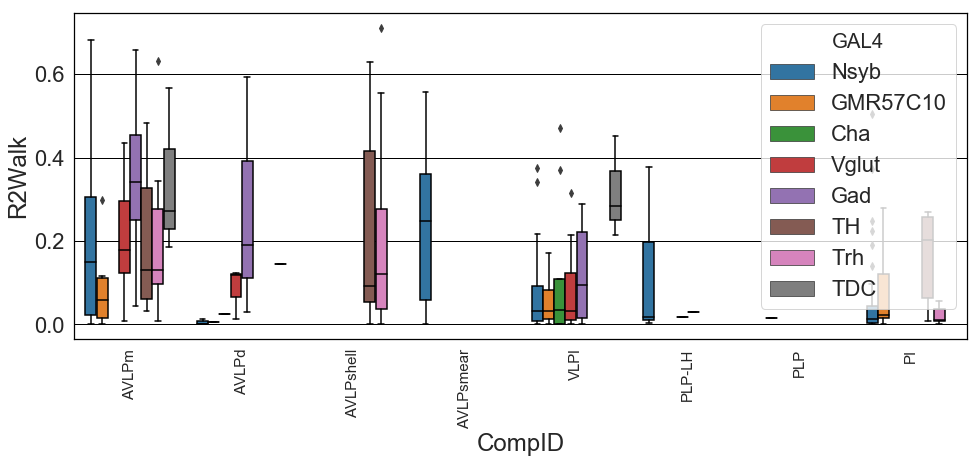

In [60]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))
df3=Compdf
df3=df3.query('R2Walk!=0')
df3=df3[df3['R2Walk'].notna()]
#df3=df3.dropna()
#df3=df3.query('GAL4=="TDC"')
df3=df3[df3['R2Walk'].astype(bool)]
df3=df3.groupby('CompID').filter(lambda x : len(x)>3)

NewOrder=[]

for i in range(len(list(CompOrder[0]))):
    if list(CompOrder[0])[i] in df3['CompID'].unique():
        NewOrder.append(list(CompOrder[0])[i])


b = sns.boxplot(x='CompID',y='R2Walk',data=df3,hue='GAL4',order=NewOrder[61:61+8])
for i,box in enumerate(b.artists):
    box.set_edgecolor('black')
    #box.set_facecolor('green')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         b.lines[j].set_color('black')
   

plt.xticks(rotation=90)
plt.xticks(fontsize=15)


plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\R2_LatN_CompWalk.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

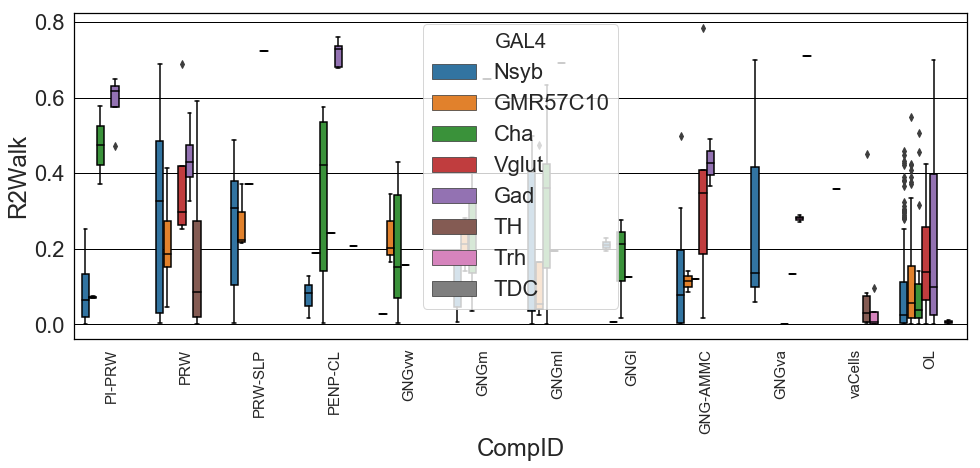

In [61]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))
df3=Compdf
df3=df3.query('R2Walk!=0')
df3=df3[df3['R2Walk'].notna()]
#df3=df3.dropna()
#df3=df3.query('GAL4=="TDC"')
df3=df3[df3['R2Walk'].astype(bool)]
df3=df3.groupby('CompID').filter(lambda x : len(x)>3)

NewOrder=[]

for i in range(len(list(CompOrder[0]))):
    if list(CompOrder[0])[i] in df3['CompID'].unique():
        NewOrder.append(list(CompOrder[0])[i])


b = sns.boxplot(x='CompID',y='R2Walk',data=df3,hue='GAL4',order=NewOrder[69:81])
for i,box in enumerate(b.artists):
    box.set_edgecolor('black')
    #box.set_facecolor('green')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         b.lines[j].set_color('black')
   

plt.xticks(rotation=90)
plt.xticks(fontsize=15)


plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\R2_MN_CompWalk.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

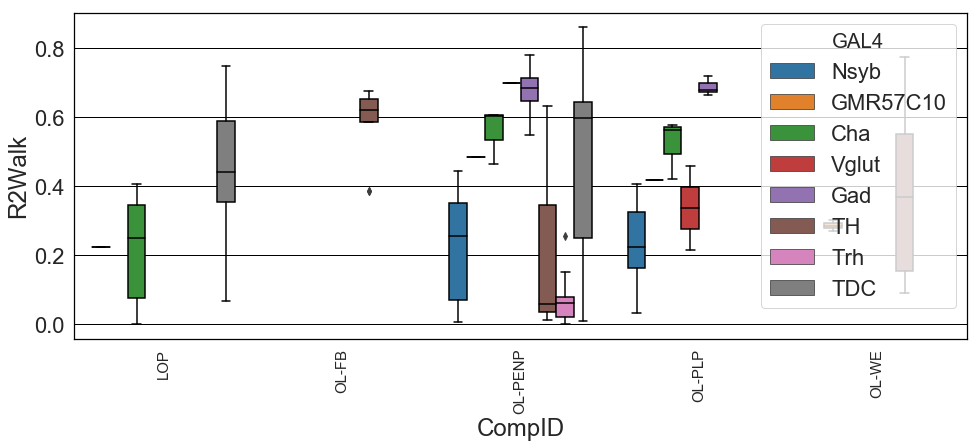

In [62]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))
df3=Compdf
df3=df3.query('R2Walk!=0')
df3=df3[df3['R2Walk'].notna()]
#df3=df3.dropna()
#df3=df3.query('GAL4=="TDC"')
df3=df3[df3['R2Walk'].astype(bool)]
df3=df3.groupby('CompID').filter(lambda x : len(x)>3)

NewOrder=[]

for i in range(len(list(CompOrder[0]))):
    if list(CompOrder[0])[i] in df3['CompID'].unique():
        NewOrder.append(list(CompOrder[0])[i])


b = sns.boxplot(x='CompID',y='R2Walk',data=df3,hue='GAL4',order=NewOrder[81:92])
for i,box in enumerate(b.artists):
    box.set_edgecolor('black')
    #box.set_facecolor('green')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         b.lines[j].set_color('black')
   

plt.xticks(rotation=90)
plt.xticks(fontsize=15)


plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\R2_OL_CompWalk.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

In [63]:
ListGal4=Compdf['GAL4'].unique()
ListGal4

array(['Nsyb', 'GMR57C10', nan, 'Cha', 'Vglut', 'Gad', 'TH', 'Trh', 'TDC'],
      dtype=object)

In [64]:
ListGal4=Compdf['GAL4'].unique()
for i in range(len(list(CompOrder[0]))):
    print(list(CompOrder[0])[i])

    for Gal4 in ['Nsyb', 'GMR57C10','Cha', 'Vglut', 'Gad', 'TH', 'Trh', 'TDC']:
        df=Compdf[Compdf['GAL4']==Gal4]
        df=df[df['CompID']==list(CompOrder[0])[i]]
        print(Gal4,':',len(df), end =" , ")

    print('\n')

AL
Nsyb : 82 , GMR57C10 : 29 , Cha : 0 , Vglut : 14 , Gad : 20 , TH : 0 , Trh : 1 , TDC : 2 , 

PN
Nsyb : 167 , GMR57C10 : 44 , Cha : 117 , Vglut : 143 , Gad : 101 , TH : 0 , Trh : 0 , TDC : 0 , 

MultiGl
Nsyb : 0 , GMR57C10 : 0 , Cha : 0 , Vglut : 0 , Gad : 1 , TH : 14 , Trh : 22 , TDC : 24 , 

PNv
Nsyb : 87 , GMR57C10 : 27 , Cha : 28 , Vglut : 33 , Gad : 39 , TH : 2 , Trh : 1 , TDC : 0 , 

PN-KC
Nsyb : 50 , GMR57C10 : 11 , Cha : 10 , Vglut : 15 , Gad : 3 , TH : 0 , Trh : 0 , TDC : 0 , 

KCab
Nsyb : 136 , GMR57C10 : 39 , Cha : 3 , Vglut : 0 , Gad : 2 , TH : 3 , Trh : 0 , TDC : 0 , 

KCapbp
Nsyb : 44 , GMR57C10 : 16 , Cha : 0 , Vglut : 0 , Gad : 0 , TH : 0 , Trh : 0 , TDC : 0 , 

KCg
Nsyb : 21 , GMR57C10 : 11 , Cha : 2 , Vglut : 0 , Gad : 2 , TH : 0 , Trh : 0 , TDC : 0 , 

Beta1Betap1
Nsyb : 1 , GMR57C10 : 0 , Cha : 0 , Vglut : 0 , Gad : 2 , TH : 32 , Trh : 0 , TDC : 0 , 

Beta2Betap2
Nsyb : 10 , GMR57C10 : 0 , Cha : 2 , Vglut : 0 , Gad : 11 , TH : 82 , Trh : 0 , TDC : 0 , 

Gamma1
Nsy

In [65]:
RegionNames=pd.read_csv('Z:\GrunwaldKadow_group\Sophie\WalkProject\RegionNames.txt',header=None)[0].to_list()

RegionNamesShort=[]
RegionSide=[]
for j in range(75):
    if '_' in RegionNames[j]:
        RegionNamesShort.append(RegionNames[j].split('_')[0])
        RegionSide.append(RegionNames[j].split('_')[1])
    else:
        RegionNamesShort.append(RegionNames[j])
        RegionSide.append('Both')

In [66]:
CompperRegion=pd.read_csv('Z:\GrunwaldKadow_group\Sophie\WalkProject\CompInRegions.txt',sep=';',header=None)

In [67]:
from operator import itemgetter, attrgetter



In [68]:
CompOrder=pd.read_csv('Z:\GrunwaldKadow_group\Sophie\WalkProject\AllCompIDOrderedVF.txt',header=None, skip_blank_lines=False)

In [69]:
for i in range(len(list(CompOrder[0]))):
    print(list(CompOrder[0])[i])
    A=sorted(zip([float(a) for a in list(CompperRegion[i])[0].replace('[', '').replace(']', '').split(',')],range(75)), key=itemgetter(0),reverse=True)
    for j in range(75):
        Weight=np.array(A)[j,0]/np.max(np.array(A)[:,0])
        if Weight>0.2:
            print(RegionNamesShort[A[j][1]],':',"{:.2f}".format(Weight), end =" , ")
            
    print('\n')

AL
AL : 1.00 , AL : 0.98 , LAL : 0.29 , 

PN
LH : 1.00 , LH : 0.89 , AL : 0.44 , SLP : 0.25 , AL : 0.24 , SLP : 0.23 , 

MultiGl
LH : 1.00 , LH : 0.90 , AL : 0.70 , AL : 0.67 , SLP : 0.27 , MBCA : 0.26 , SCL : 0.24 , 

PNv
LH : 1.00 , LH : 0.72 , PLP : 0.65 , PLP : 0.41 , AL : 0.39 , AL : 0.37 , SCL : 0.31 , 

PN-KC
LH : 1.00 , LH : 0.57 , MBCA : 0.23 , SLP : 0.21 , 

KCab
MBML : 1.00 , MBVL : 0.96 , SIP : 0.89 , MBVL : 0.87 , MBML : 0.86 , SIP : 0.78 , CRE : 0.64 , SCL : 0.59 , SCL : 0.59 , CRE : 0.51 , MBCA : 0.42 , SMP : 0.40 , MBCA : 0.34 , SLP : 0.30 , MBPED : 0.29 , SMP : 0.28 , MBPED : 0.23 , SLP : 0.22 , 

KCapbp
MBML : 1.00 , CRE : 0.77 , MBML : 0.77 , CRE : 0.58 , MBVL : 0.53 , MBVL : 0.40 , SMP : 0.32 , SMP : 0.31 , SIP : 0.25 , SIP : 0.23 , 

KCg
MBML : 1.00 , MBML : 0.94 , SCL : 0.62 , SCL : 0.56 , CRE : 0.56 , CRE : 0.49 , SMP : 0.44 , MBCA : 0.39 , SMP : 0.39 , MBCA : 0.33 , MBPED : 0.24 , SIP : 0.22 , SLP : 0.22 , MBVL : 0.21 , 

nan


Beta1Betap1
MBML : 1.00 , MBML : 0

In [70]:
ListGal4=Compdf['GAL4'].unique()
for i in range(len(list(CompOrder[0]))):
    print(list(CompOrder[0])[i])

    df=Compdf[Compdf['UAS']=='syt6s']
    df=df[df['CompID']==list(CompOrder[0])[i]]
    print('syt6s',':',len(df), end =" , ")

    print('\n')

AL
syt6s : 41 , 

PN
syt6s : 114 , 

MultiGl
syt6s : 0 , 

PNv
syt6s : 46 , 

PN-KC
syt6s : 18 , 

KCab
syt6s : 16 , 

KCapbp
syt6s : 14 , 

KCg
syt6s : 2 , 

nan
syt6s : 0 , 

Beta1Betap1
syt6s : 0 , 

Beta2Betap2
syt6s : 5 , 

Gamma1
syt6s : 0 , 

Gamma2
syt6s : 3 , 

Gamma3
syt6s : 0 , 

Gamma4
syt6s : 2 , 

Gamma5
syt6s : 0 , 

SLP-Alpha
syt6s : 1 , 

Alpha1
syt6s : 0 , 

Alpha2
syt6s : 1 , 

Alpha3
syt6s : 6 , 

Alphap3
syt6s : 0 , 

nan
syt6s : 0 , 

SCLtract
syt6s : 0 , 

CLvert
syt6s : 2 , 

CL?
syt6s : 1 , 

CL-LH
syt6s : 0 , 

CL
syt6s : 29 , 

nan
syt6s : 0 , 

SMPm
syt6s : 31 , 

SMPd-PI
syt6s : 10 , 

PPL-SMP
syt6s : 0 , 

SMPl-SIP
syt6s : 21 , 

SIP-SMPd
syt6s : 14 , 

SIP-FB
syt6s : 7 , 

FB-SN
syt6s : 0 , 

SLP-SMPproj
syt6s : 18 , 

SLP-SMP
syt6s : 0 , 

SLP
syt6s : 17 , 

LH-SLP
syt6s : 0 , 

nan
syt6s : 0 , 

FBcol
syt6s : 33 , 

FBlayv
syt6s : 3 , 

FBlaym
syt6s : 3 , 

FBlayd
syt6s : 2 , 

NO
syt6s : 6 , 

PB
syt6s : 8 , 

PBfull
syt6s : 2 , 

PB-DA
syt6s : 0 , 

B

In [71]:
A[5][0]

6.3581367

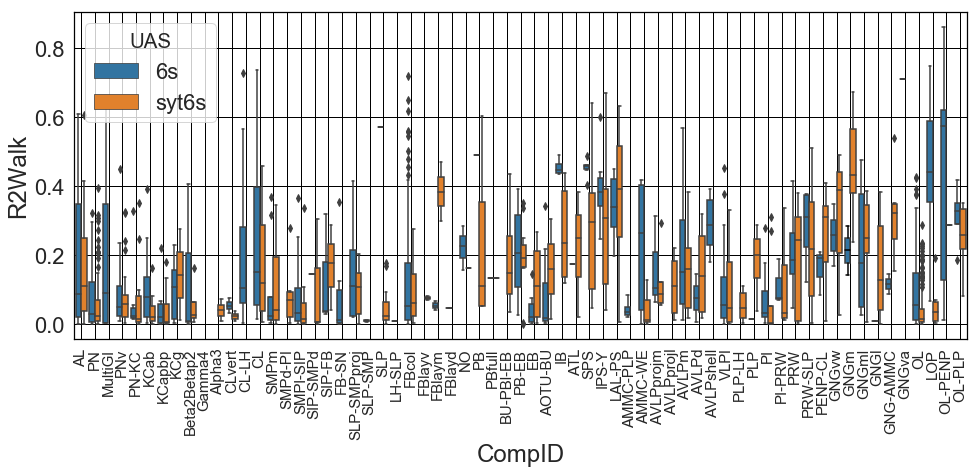

In [72]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))

df2=Compdf
df3=df2.query('GAL4!="Trh" or GAL4!="TDC" or GAL4!="TH" or GAL4!="Cha" or GAL4!="Gad" or GAL4!="Vglut"')
df4=df2.query('UAS=="syt6s" or UAS=="6s"')
df4=df4.groupby('CompID').filter(lambda x : len(x)>3)
#df2=Regionsdf.loc[Regionsdf['GAL4']=='Nsyb']
NewOrder=[]

for i in range(len(list(CompOrder[0]))):
    if list(CompOrder[0])[i] in df4['CompID'].unique():
        NewOrder.append(list(CompOrder[0])[i])


b = sns.boxplot(x='CompID',y='R2Walk',data=df4,hue='UAS',order=NewOrder)


    # iterate over whiskers and median lines
for j in range(6*i,6*(i+1)):
        b.lines[j].set_color('black')
   

plt.xticks(rotation=90)
plt.xticks(fontsize=15)

b.grid(True)
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\R2RegionsAllWalk_sytg_notsyt.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

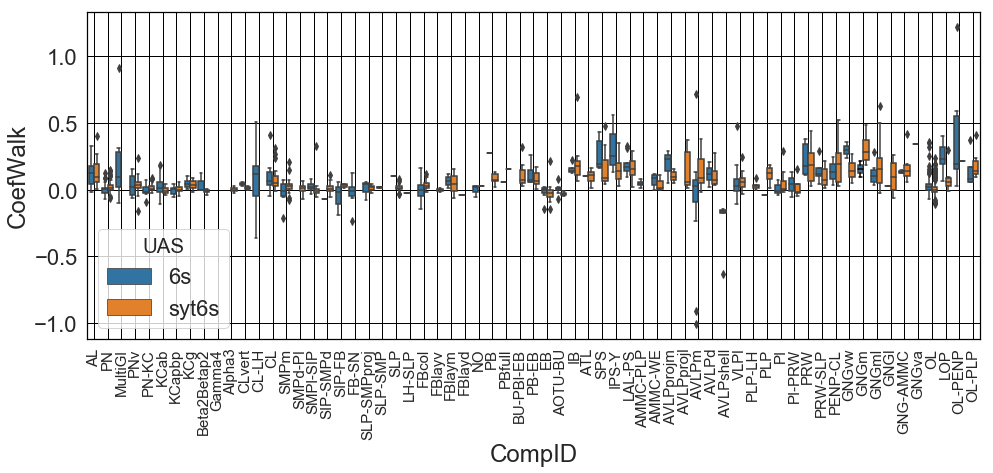

In [73]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))

df2=Compdf
df3=df2.query('GAL4!="Trh" or GAL4!="TDC" or GAL4!="TH" or GAL4!="Cha" or GAL4!="Gad" or GAL4!="Vglut"')
df4=df2.query('UAS=="syt6s" or UAS=="6s"')
df4=df4.groupby('CompID').filter(lambda x : len(x)>3)
#df2=Regionsdf.loc[Regionsdf['GAL4']=='Nsyb']
NewOrder=[]

for i in range(len(list(CompOrder[0]))):
    if list(CompOrder[0])[i] in df4['CompID'].unique():
        NewOrder.append(list(CompOrder[0])[i])


b = sns.boxplot(x='CompID',y='CoefWalk',data=df4,hue='UAS',order=NewOrder)


    # iterate over whiskers and median lines
for j in range(6*i,6*(i+1)):
        b.lines[j].set_color('black')
   

plt.xticks(rotation=90)
plt.xticks(fontsize=15)

b.grid(True)
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\CoefRegionsAllWalk_sytg_notsyt.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

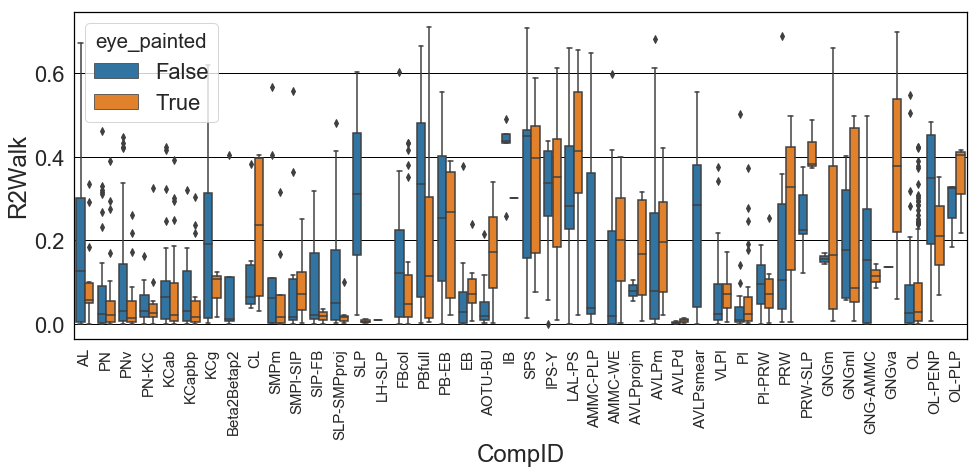

In [74]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))

df2=Compdf
df2=df2.query('GAL4!="Trh" or GAL4!="TDC" or GAL4!="TH" or GAL4!="Cha" or GAL4!="Gad" or GAL4!="Vglut"')
df4=df2.query('eye_painted==True or eye_painted==False')
df4=df4.groupby('CompID').filter(lambda x : len(x)>3)
#df2=Regionsdf.loc[Regionsdf['GAL4']=='Nsyb']
NewOrder=[]

for i in range(len(list(CompOrder[0]))):
    if list(CompOrder[0])[i] in df4['CompID'].unique():
        NewOrder.append(list(CompOrder[0])[i])


b = sns.boxplot(x='CompID',y='R2Walk',data=df4,hue='eye_painted',order=NewOrder)


    # iterate over whiskers and median lines
#for j in range(6*i,6*(i+1)):
 #       b.lines[j].set_color('black')
   

plt.xticks(rotation=90)
plt.xticks(fontsize=15)


plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\R2RegionsAllWalk_eyepainted.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

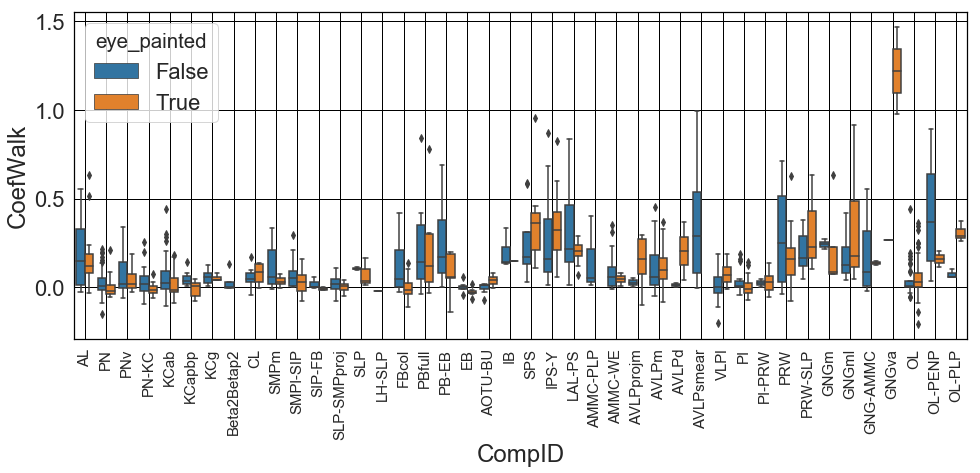

In [76]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))

df2=Compdf
df2=df2.query('GAL4!="Trh" or GAL4!="TDC" or GAL4!="TH" or GAL4!="Cha" or GAL4!="Gad" or GAL4!="Vglut"')
df4=df2.query('eye_painted==True or eye_painted==False')
df4=df4.groupby('CompID').filter(lambda x : len(x)>3)
#df2=Regionsdf.loc[Regionsdf['GAL4']=='Nsyb']
NewOrder=[]

for i in range(len(list(CompOrder[0]))):
    if list(CompOrder[0])[i] in df4['CompID'].unique():
        NewOrder.append(list(CompOrder[0])[i])


b = sns.boxplot(x='CompID',y='CoefWalk',data=df4,hue='eye_painted',order=NewOrder)


    # iterate over whiskers and median lines
#for j in range(6*i,6*(i+1)):
 #       b.lines[j].set_color('black')
   

plt.xticks(rotation=90)
plt.xticks(fontsize=15)

b.grid(True)
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\CoefRegionsAllWalk_eyepainted.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()